# Reducing Maize Post-Harvest Losses in Sub-Saharan Africa: A Data-Driven Approach Using Time Series Modeling, Anomaly Detection, and Inferential Regression.

## Project by:
* Shadrack Muchai.
* Ruth Nanjala.
* Kelvin Rotich.
* MaryImmaculate Kariuki.
* Dennis Kimani.

## Project Introduction.

### Background of Maize Postharvest Loss in Sub-Saharan Africa.

Maize is a vital staple food crop for millions across sub-Saharan Africa, forming a significant portion of daily calorie intake. However, despite its importance, a substantial amount of maize is lost after harvest, posing a major challenge to food security and economic well-being in the region. This background will explore the key factors contributing to maize post-harvest loss in sub-Saharan Africa.

#### Magnitude and Impact of post-harvest loss.

Estimates suggest that 13.5% of maize harvested in sub-Saharan Africa is lost after harvest, ranging from 5% to 40% depending on the region and storage methods. This translates to millions of tons of lost grain annually, representing significant economic losses for farmers, reduced food availability for consumers, and wasted resources.

#### Key Factors Contributing to post-harvest loss.

* Inadequate storage: Traditional storage practices using on-farm structures like cribs or sacks often lack proper ventilation and protection from insects, rodents, and moisture, leading to spoilage and weight loss.
* Limited access to improved technologies: Hermetic bags, metal silos, and other improved storage technologies can significantly reduce losses, but their availability and affordability are often limited in rural areas.
* Poor infrastructure and transportation: Deficient transportation networks and inadequate roads make it difficult to move maize from farms to markets or processing facilities efficiently, increasing exposure to damage and spoilage.
* Market inefficiencies: Limited access to markets, price fluctuations, and inadequate information systems can discourage farmers from investing in better storage and contribute to losses.
* Pre-harvest factors: Pests and diseases during the growing season can damage crops, reducing yields and contributing to post-harvest loss later.

#### Consequences of post-harvest loss.

* Food insecurity: Reduced maize availability exacerbates food insecurity, particularly for vulnerable populations who rely heavily on the crop.
* Economic losses: Farmers lose income from unsold maize, and governments incur costs associated with food aid and malnutrition.
* Environmental impact: Spoiled maize contributes to greenhouse gas emissions and resource waste.

#### Efforts to Address post-harvest loss.

Several initiatives are underway to combat post-harvest loss in sub-Saharan Africa, focusing on:

* Promoting improved storage technologies: Disseminating and subsidizing the adoption of hermetic bags, metal silos, and other effective storage solutions.
* Strengthening infrastructure and transportation: Investing in road improvements, storage facilities, and market access to facilitate efficient movement of maize.
* Empowering farmers: Providing training and resources to farmers on best practices for harvesting, handling, and storing maize.
* Developing market-based solutions: Establishing efficient market systems and price stabilization mechanisms to incentivize farmers to reduce losses.

#### Conclusion.

Maize post-harvest loss is a complex issue with significant social, economic, and environmental consequences in sub-Saharan Africa. Addressing this challenge requires a multi-pronged approach that combines technological advancements, infrastructure improvements, market development, and farmer empowerment. By investing in effective solutions, we can unlock the full potential of maize production and contribute to food security and sustainable development in the region.

### Business Understanding.

#### Stakeholders who would benefit.

* Farmers: Farmers will gain insights to improve storage practices and reduce losses.
* Policymakers: They will develop targeted interventions and infrastructure improvements.
* Agricultural extension workers: This project will help them provide more effective guidance to farmers.
* Food security organizations: They will optimize resource allocation and logistics.
* Private sector stakeholders: It will help them identify opportunities for loss reduction technologies and services.

#### Business Values.

* Reduced post-harvest losses lead to increased food availability and reduced food insecurity.
* Improved market stability and reduced price volatility for maize.
* Increased income for farmers and economic growth in the region.
* More efficient use of resources and reduced environmental impact.

In conclusion, this project has the potential to make a significant impact on food security and economic development in Sub-Saharan Africa by leveraging the power of data science and machine learning.

### Problem Statement.

Post-harvest losses of maize are a significant challenge in Sub-Saharan Africa, leading to immense economic and food security concerns. These losses can range from 30% to 50% due to various factors. Traditional methods for monitoring and mitigating these losses often need to be more effective and resource-intensive.

### Objectives.

* To gain insights into the distribution, trends, and relationships within the data by using Exploratory Data Analysis.
* To build an inferential regression model that will help us understand the relationships between the features and post-harvest losses.
* To utilize unsupervised learning techniques for anomaly detection that will identify unusual patterns associated with high losses.
* To develop a time series model that will predict maize post-harvest loss weight across Sub-Saharan Africa.


### Importing the necessary libraries.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, IsolationForest
import optuna
from xgboost import XGBRegressor
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from prophet import Prophet
from matplotlib.pylab import rcParams
from statsmodels.tsa.arima.model import ARIMA
import itertools
import joblib

## Data Transformation.

Our data was collected from FAOSTAT which has global statistics on every aspect pertaining agriculture and the African Post-Harvest Losses Information System(APHLIS) which has data on cereal postharvest loss in Sub-Saharan countries. We need to transform our collected data and store it in one dataframe so that we can be able to use it for analysis and modeling. We will begin by loading our datasets.

In [7]:
# Loading the datasets
df1 = pd.read_csv("CPI.csv")
df2= pd.read_csv("Dry weight loss.csv")
df3 = pd.read_csv("GPI.csv")
df4 = pd.read_csv("Import.csv")
df5 = pd.read_csv("Nutrients use.csv")
df6 = pd.read_csv("Pesticide use.csv")
df7 = pd.read_csv("temperature change.csv")
df8 = pd.read_csv("Yield.csv")

We will then merge our datasets.

In [8]:
# Merging our datasets to one dataframe

# Merging df1 with df3
data = df1.merge(df3,left_on=['country','year'],right_on=['country','year'], how="inner")
data = data.drop(["Unnamed: 0_x","Unnamed: 0_y"],axis = 1)

In [9]:
# Merging df1 with df4
data = data.merge(df4,left_on=['country','year'],right_on=['country','year'], how="inner")
data = data.drop(["Unnamed: 0"],axis = 1)

In [10]:
# Merging df1 with df5
data = data.merge(df5,left_on=['country','year'],right_on=['country','year'], how="inner")
data = data.drop(["Unnamed: 0.1", "Unnamed: 0"],axis = 1)

In [11]:
# Merging df1 with df6
data = data.merge(df6,left_on=['country','year'],right_on=['country','year'], how="inner")
data= data.drop(["Unnamed: 0"],axis = 1)

In [12]:
# Merging df1 with df7
data = data.merge(df7,left_on=['country','year'],right_on=['country','year'], how="inner")
data= data.drop(["Unnamed: 0"],axis = 1)

In [13]:
# Merging df1 with df8
data = data.merge(df8,left_on=['country','year'],right_on=['country','year'], how="inner")
data= data.drop(["Unnamed: 0"],axis = 1)

In [14]:
# Merging df1 with df2 which has the target variable
data = data.merge(df2,left_on=['country','year'],right_on=['country','year'], how="inner")
data= data.drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1","Unnamed: 0.2"],axis = 1)

In [15]:
# Checking our data
data.head()

,country,year,cpi,maize GPI,Import Quantity,Import Value,Cropland nitrogen per unit area,Cropland potassium per unit area,pesticide use per area of cropland,temperature change,Area harvested,Production,Yield,dry weight loss
0,Angola,2000.0,1.691044,35.10,113900.0,16400,25.1339,11.5089,0.01,0.169,686853,394607.0,5745,16.7701
1,Angola,2001.0,3.567232,36.90,170000.0,27000,28.6364,13.2095,0.01,0.295,745169,428769.0,5754,16.8401
2,Angola,2002.0,7.109792,45.52,145000.0,15628,30.7173,14.6940,0.01,0.735,815428,546860.0,6706,16.8763
3,Angola,2003.0,14.849055,49.78,146751.0,22716,31.3211,15.3839,0.01,0.889,818445,618684.0,7559,16.8620
4,Angola,2004.0,22.189789,44.82,112000.0,12959,36.3349,17.6348,0.01,0.414,1067772,577000.0,5404,16.8710


Now that our data has been transformed, we can now head to data understanding.

## Data Understanding 

Here, we get to understand the data and its characteristics. We will use one function which will return everything we need to know about the data.

In [16]:
"""
This function takes the data as input then outputs the shape,
columns, first five rows and summary of the data.
"""
def load_and_examine_data(df):
    # Display the shape, columns and the first few rows of the dataset
    print("----------------------------Details about the data----------------------------\n")
    print("----------------------------Shape of the dataset----------------------------\n")
    display(df.shape)
    print()
    print("----------------------------Columns of the dataset----------------------------\n")
    display(df.columns)
    print()
    print("----------------------------Head of the dataset----------------------------\n")
    display(df.head())
    print()
    # Display information about the dataset
    print("\n----------------------------Data information ----------------------------\n")
    display(df.info())
    print("\n----------------------------Descriptive Statistics of the dataset ----------------------------\n")
    display(df.describe())
    
load_and_examine_data(data)

----------------------------Details about the data----------------------------

----------------------------Shape of the dataset----------------------------



(682, 14)


----------------------------Columns of the dataset----------------------------



Index(['country', 'year', 'cpi', 'maize GPI', 'Import Quantity',
       'Import Value', 'Cropland nitrogen per unit area',
       'Cropland potassium per unit area',
       'pesticide use per area of cropland', 'temperature change',
       'Area harvested', 'Production', 'Yield', 'dry weight loss'],
      dtype='object')


----------------------------Head of the dataset----------------------------



,country,year,cpi,maize GPI,Import Quantity,Import Value,Cropland nitrogen per unit area,Cropland potassium per unit area,pesticide use per area of cropland,temperature change,Area harvested,Production,Yield,dry weight loss
0,Angola,2000.0,1.691044,35.10,113900.0,16400,25.1339,11.5089,0.01,0.169,686853,394607.0,5745,16.7701
1,Angola,2001.0,3.567232,36.90,170000.0,27000,28.6364,13.2095,0.01,0.295,745169,428769.0,5754,16.8401
2,Angola,2002.0,7.109792,45.52,145000.0,15628,30.7173,14.6940,0.01,0.735,815428,546860.0,6706,16.8763
3,Angola,2003.0,14.849055,49.78,146751.0,22716,31.3211,15.3839,0.01,0.889,818445,618684.0,7559,16.8620
4,Angola,2004.0,22.189789,44.82,112000.0,12959,36.3349,17.6348,0.01,0.414,1067772,577000.0,5404,16.8710




----------------------------Data information ----------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             682 non-null    object 
 1   year                                682 non-null    float64
 2   cpi                                 682 non-null    float64
 3   maize GPI                           682 non-null    float64
 4   Import Quantity                     682 non-null    float64
 5   Import Value                        682 non-null    int64  
 6   Cropland nitrogen per unit area     682 non-null    float64
 7   Cropland potassium per unit area    682 non-null    float64
 8   pesticide use per area of cropland  682 non-null    float64
 9   temperature change                  682 non-null    float64
 10  Area harvested                   

None


----------------------------Descriptive Statistics of the dataset ----------------------------



,year,cpi,maize GPI,Import Quantity,Import Value,Cropland nitrogen per unit area,Cropland potassium per unit area,pesticide use per area of cropland,temperature change,Area harvested,Production,Yield,dry weight loss
count,682.000000,682.000000,682.000000,6.820000e+02,682.000000,682.000000,682.000000,682.000000,682.000000,6.820000e+02,6.820000e+02,682.000000,682.000000
mean,2010.500000,98.981335,111.253636,8.159703e+04,20676.288856,60.582494,20.155418,0.605601,0.944811,9.869577e+05,1.806890e+06,15083.769795,17.369638
std,6.348945,317.960156,78.214015,1.974623e+05,46166.839746,33.054237,10.438252,0.955162,0.418607,1.203177e+06,2.805012e+06,9662.242928,1.638721
min,2000.000000,1.691044,3.260000,0.000000e+00,0.000000,11.870900,2.715600,0.000000,-0.718000,1.186000e+03,9.790000e+02,849.000000,14.330800
25%,2005.000000,53.966716,77.990000,2.523762e+03,956.000000,41.143325,14.536750,0.060000,0.698000,7.482975e+04,7.162525e+04,8696.000000,16.337025
50%,2010.500000,83.116706,98.915000,1.844855e+04,6113.000000,51.561500,18.407800,0.210000,0.969000,5.388360e+05,7.364995e+05,13639.000000,17.210200
75%,2016.000000,101.112909,121.387500,9.009306e+04,22261.000000,70.360850,22.869075,0.790000,1.212750,1.507690e+06,2.233146e+06,18508.000000,17.990925
max,2021.000000,7500.208768,834.000000,3.268718e+06,629964.000000,220.488700,65.065400,6.760000,2.141000,6.804973e+06,1.755100e+07,135517.000000,25.258800


We can see that our data has 682 rows and 14 columns. 

#### Additional column information.

* `country`: Categorical variable representing the specific country each data point corresponds to.
* `year`: Numerical variable indicating the year for which the data was collected.
* `cpi`: Numerical variable representing the average price of a basket of essential food items in a specific country and year.
* `maize GPI`: Numerical variable indicating the global price of maize in a specific year.
* Import Quantity: Numerical variable representing the amount of imports made by a country in a specific year.
* `Import Value`: Numerical variable representing the total value of imports made by a country in a specific year.
* `Cropland nitrogen per unit area`: The average amount of nitrogen fertilizer applied to cropland per unit area in a specific country and year.
* `Cropland potassium per unit area`: The average amount of potassium fertilizer applied to cropland per unit area in a specific country and year.
* `pesticide use per area of cropland`: The average amount of pesticide used per unit area of. cropland in a specific country and year.
* `temperature change`: The average temperature change in a specific country and year compared to a baseline period. 
* `Area harvested`: The total area of land harvested for maize production in a specific country and year.
* `Production`: The total amount of maize produced in a specific country and year.
* `Yield`: The average yield of maize per unit area harvested in a specific country and year.
* `dry weight loss`: The weight of maize lost after harvest in a specific country and year and is measured in tonnes. 

## Data Preparation

In this section, we will focus on some of the key aspects of data preparation:

* Checking for missing values
* Handling duplicates
* Checking for placeholders
* Checking for outliers
* Datatype conversion
* Feature engineering

We will begin by creating a function that checks for missing values, duplicates and placeholders in the dataset.

In [17]:
# Creating a function that checks for missing, duplicated and placeholder values.

def data_prep(df):
    print('-------------------------Missing Values Check---------------------------------------\n')
    print(f'Number of null values in each column in the dataset:\n{df.isnull().sum()}\n')
    print('-------------------------Duplicated Values Check------------------------------------\n')
    print(f'Number of duplicated values in the dataset: {df.duplicated().sum()}\n')
    print('-------------------------Placeholder Values Check-----------------------------------\n')
    for column in df.columns:
        unique_values = df[column].unique()
        placeholders = [value for value in unique_values if str(value).strip().lower() in ['placeholder', 'na', 'n/a', '?']]
        placeholder_count = len(placeholders)
    
        print(f"Column: '{column}'")
        print(f"Placeholders found: {placeholders}")
        print(f"Count of placeholders: {placeholder_count}\n")
# Checking in our dataset.
data_prep(data)

-------------------------Missing Values Check---------------------------------------

Number of null values in each column in the dataset:
country                               0
year                                  0
cpi                                   0
maize GPI                             0
Import Quantity                       0
Import Value                          0
Cropland nitrogen per unit area       0
Cropland potassium per unit area      0
pesticide use per area of cropland    0
temperature change                    0
Area harvested                        0
Production                            0
Yield                                 0
dry weight loss                       0
dtype: int64

-------------------------Duplicated Values Check------------------------------------

Number of duplicated values in the dataset: 0

-------------------------Placeholder Values Check-----------------------------------

Column: 'country'
Placeholders found: []
Count of placeholders: 0

C

We can see that our data does not have any missing, duplicated and placeholder values. We can now head over and create a function that will check for outliers in the dataset. We will also create boxplots that will visualize how the outliers are distributed.

In [18]:
# Creating a function that checks for outliers

def check_outliers(df, columns):
    for column in columns:
        # Calculate IQR (Interquartile Range)
        iqr = df[column].quantile(0.75) - df[column].quantile(0.25)
        
        # Define lower and upper thresholds
        lower_threshold = df[column].quantile(0.25) - 1.5 * iqr
        upper_threshold = df[column].quantile(0.75) + 1.5 * iqr
        # Find outliers
        outliers = df[(df[column] < lower_threshold) | (df[column] > upper_threshold)]

        # Print the count of outliers
        print(f"{column}\nNumber of outliers: {len(outliers)}\n")

columns_to_check = data[["cpi",
                        "maize GPI",
                        "Import Quantity",
                        "Import Value",
                        "Cropland nitrogen per unit area",
                        "Cropland potassium per unit area",
                        "pesticide use per area of cropland",
                        "temperature change",
                        "Area harvested",
                        "Production",
                        "Yield",
                        "dry weight loss"]]  
check_outliers(data, columns_to_check)

cpi
Number of outliers: 20

maize GPI
Number of outliers: 56

Import Quantity
Number of outliers: 59

Import Value
Number of outliers: 59

Cropland nitrogen per unit area
Number of outliers: 42

Cropland potassium per unit area
Number of outliers: 39

pesticide use per area of cropland
Number of outliers: 56

temperature change
Number of outliers: 17

Area harvested
Number of outliers: 25

Production
Number of outliers: 61

Yield
Number of outliers: 24

dry weight loss
Number of outliers: 32



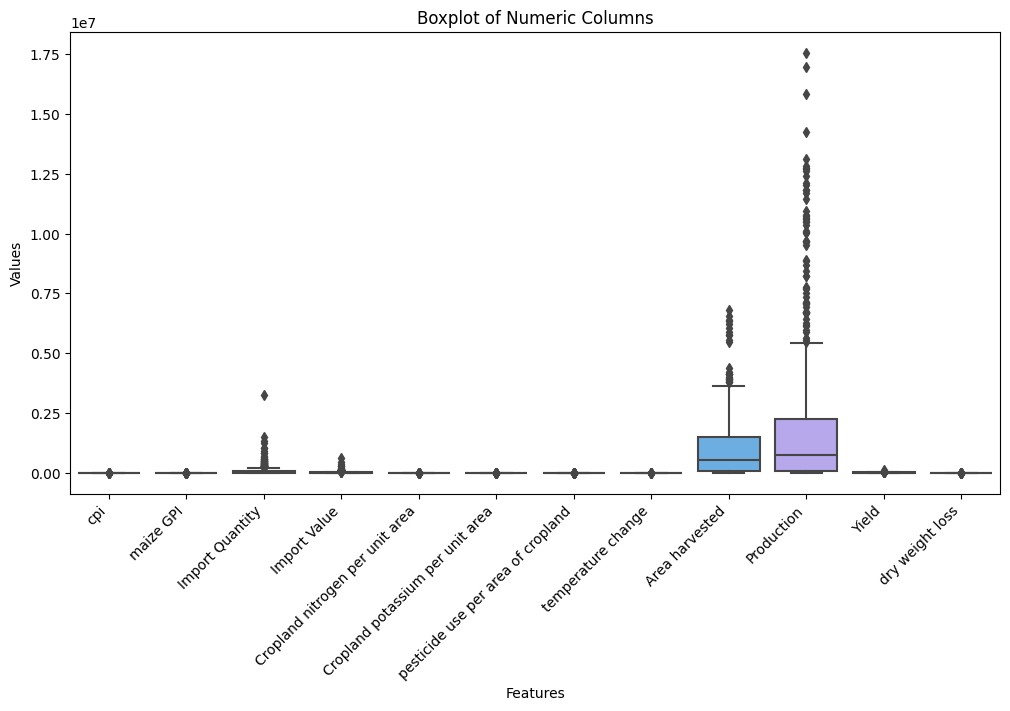

In [19]:
# Plotting to check for outliers

features_to_plot = data[["cpi",
                        "maize GPI",
                        "Import Quantity",
                        "Import Value",
                        "Cropland nitrogen per unit area",
                        "Cropland potassium per unit area",
                        "pesticide use per area of cropland",
                        "temperature change",
                        "Area harvested",
                        "Production",
                        "Yield",
                        "dry weight loss"]]                      
plt.figure(figsize=(12,6))
sns.boxplot(data=features_to_plot, ax=plt.gca())
plt.xticks(rotation=45, ha='right')
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplot of Numeric Columns')
plt.show();

From the function and the boxplots we can see that our data contains outliers. However, we will not drop them because they were genuine recorded events. 

We will conduct feature engineering where we will create a new column called `Region` where we will divide these countries to regions based on where the countries are located across Africa.

In [20]:
# Creating the 'Region' column

# Dividing the countries into lists of their positions in Africa
central = ["Burundi", 
           "Cameroon", 
           "Central African Republic", 
           "Chad", 
           "Congo", 
           "Democratic Republic of the Congo",
           "Equatorial Guinea",  
           "Gabon"]
east = ["Eritrea", 
        "Ethiopia", 
        "Kenya", 
        "Madagascar", 
        "Rwanda", 
        "Somalia",
        "Sudan",
        "Uganda",
        "United Republic of Tanzania"]
south = ["Angola", 
        "Botswana", 
        "Eswatini", 
        "Lesotho", 
        "Malawi", 
        "Mozambique",
        "Namibia",
        "South Africa",
        "Zambia",
        "Zimbabwe"]
west = ["Benin", 
        "Burkina Faso", 
        "Côte d'Ivoire", 
        "Gambia", 
        "Ghana", 
        "Guinea", 
        "Guinea-Bissau",  
        "Liberia",
        "Mali",
        "Niger",
        "Nigeria",
        "Senegal",
        "Sierra Leone",
        "Togo"]

north = ["Mauritania"]

# Creating an empty 'Region' column in the DataFrame
data['Region'] = ""

# Iterating over each row in the DataFrame and assign the region based on the country
for index, row in data.iterrows():
    if row['country'] in central:
        data.at[index, 'Region'] = "Central Africa"
    elif row['country'] in east:
        data.at[index, 'Region'] = "Eastern Africa"
    elif row['country'] in south:
        data.at[index, 'Region'] = "Southern Africa"
    elif row['country'] in west:
        data.at[index, 'Region'] = "Western Africa"
    elif row['country'] in north:
        data.at[index, 'Region'] = "Northern Africa"
    else:
        data.at[index, 'Region'] = "Other"

# Reordering the columns
column_order = ['country', 'Region', 'year', 'cpi', 'maize GPI', 'Import Quantity', 'Import Value', 'Cropland nitrogen per unit area', 'Cropland potassium per unit area', 'pesticide use per area of cropland', 'temperature change', 'Area harvested', 'Production', 'Yield', 'dry weight loss']

# Reordering the DataFrame columns
data = data[column_order]

# Checking the data
data.head()


,country,Region,year,cpi,maize GPI,Import Quantity,Import Value,Cropland nitrogen per unit area,Cropland potassium per unit area,pesticide use per area of cropland,temperature change,Area harvested,Production,Yield,dry weight loss
0,Angola,Southern Africa,2000.0,1.691044,35.10,113900.0,16400,25.1339,11.5089,0.01,0.169,686853,394607.0,5745,16.7701
1,Angola,Southern Africa,2001.0,3.567232,36.90,170000.0,27000,28.6364,13.2095,0.01,0.295,745169,428769.0,5754,16.8401
2,Angola,Southern Africa,2002.0,7.109792,45.52,145000.0,15628,30.7173,14.6940,0.01,0.735,815428,546860.0,6706,16.8763
3,Angola,Southern Africa,2003.0,14.849055,49.78,146751.0,22716,31.3211,15.3839,0.01,0.889,818445,618684.0,7559,16.8620
4,Angola,Southern Africa,2004.0,22.189789,44.82,112000.0,12959,36.3349,17.6348,0.01,0.414,1067772,577000.0,5404,16.8710


Now that the `Region` column has been created we can now sort one more issue; we need to convert the `year` column from a float to an integer. 

In [21]:
# Convert 'year' column to integer type
data["year"] = data["year"].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   country                             682 non-null    object 
 1   Region                              682 non-null    object 
 2   year                                682 non-null    int32  
 3   cpi                                 682 non-null    float64
 4   maize GPI                           682 non-null    float64
 5   Import Quantity                     682 non-null    float64
 6   Import Value                        682 non-null    int64  
 7   Cropland nitrogen per unit area     682 non-null    float64
 8   Cropland potassium per unit area    682 non-null    float64
 9   pesticide use per area of cropland  682 non-null    float64
 10  temperature change                  682 non-null    float64
 11  Area harvested                      682 non-n

With that we can conclude the data preparation and head over to Exploratory Data Analysis.

## Exploratory Data Analysis.

### Univariate Data Analysis

We will begin our analysis by creating histograms to look at the distributions for our datasets.

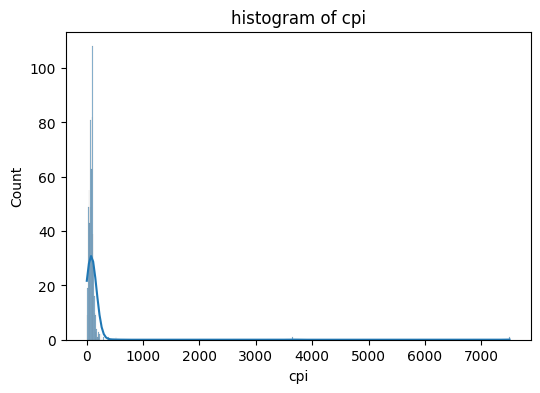

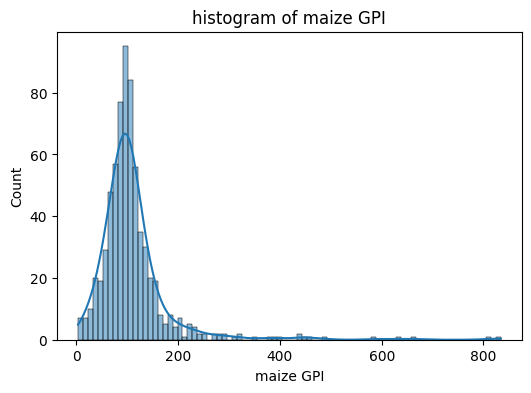

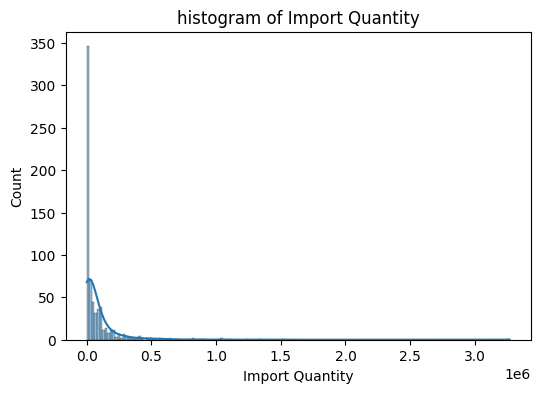

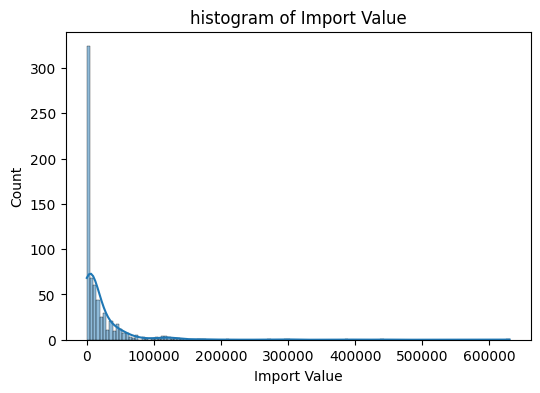

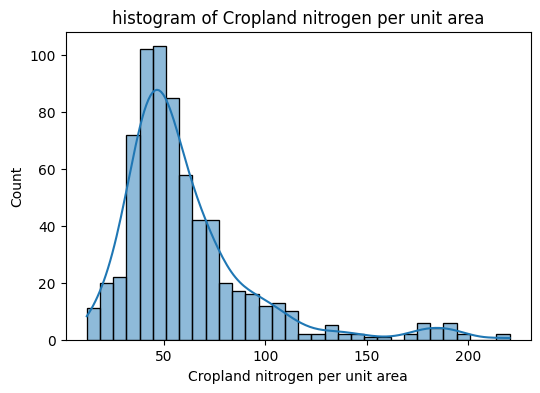

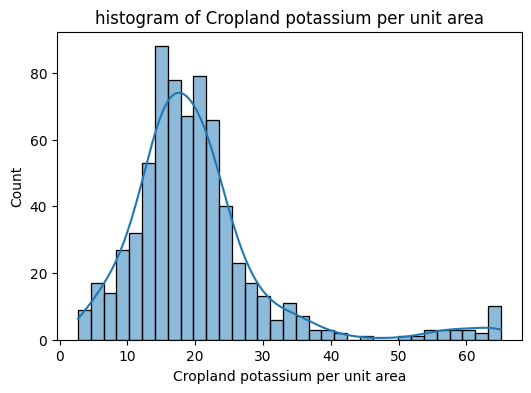

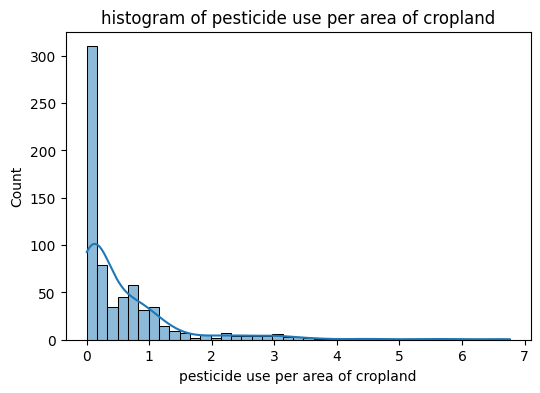

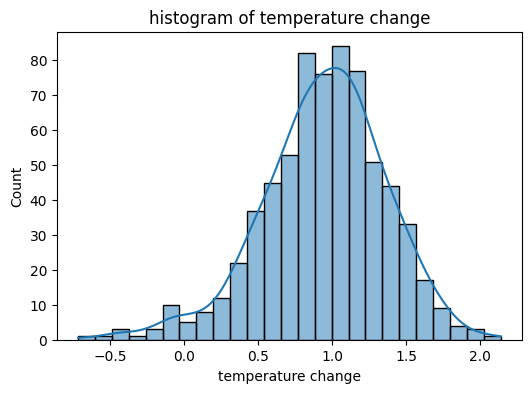

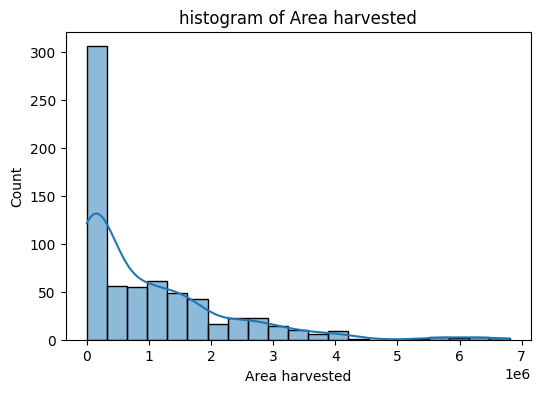

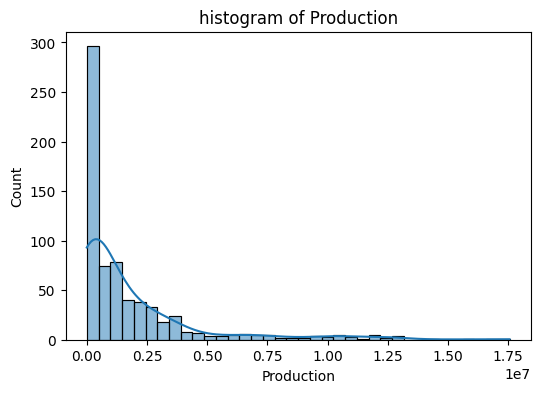

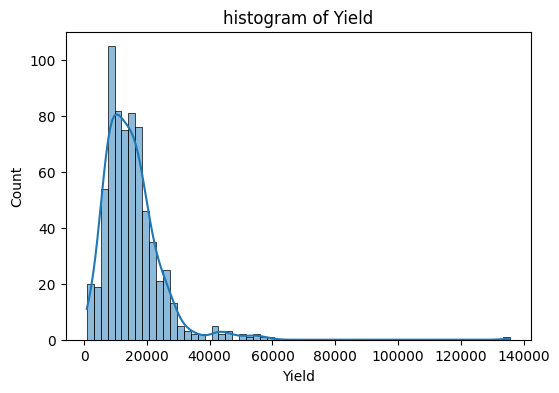

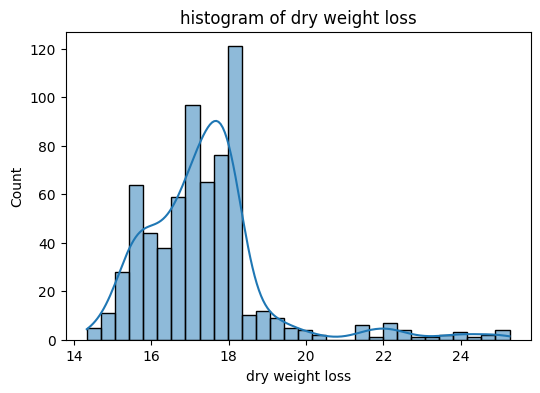

In [22]:
# Creating histograms for selected columns

# Identify numerical columns
numeric_columns = data[['cpi', 'maize GPI', 'Import Quantity', 'Import Value','Cropland nitrogen per unit area', 'Cropland potassium per unit area','pesticide use per area of cropland', 'temperature change', 'Area harvested','Production', 'Yield', 'dry weight loss']]

# Iterate over numerical columns and create histograms
for column in numeric_columns.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=numeric_columns, x=column, bins = 'auto', common_norm = False, kde = True)
    plt.title(f"histogram of {column}")
    plt.show()

Based on the histograms posted, we can see that all of them save for `temperature change` are positively skewed which means that their means are lower than their median values. It also means that almost all of them do not follow a normal distribution. We will now head over to bivariate analysis.

We can now head over to the bivariate analysis.

### Bivariate Analysis

We will begin our analysis by creating scatter plots that will help us compare the numerical features to the target variable.

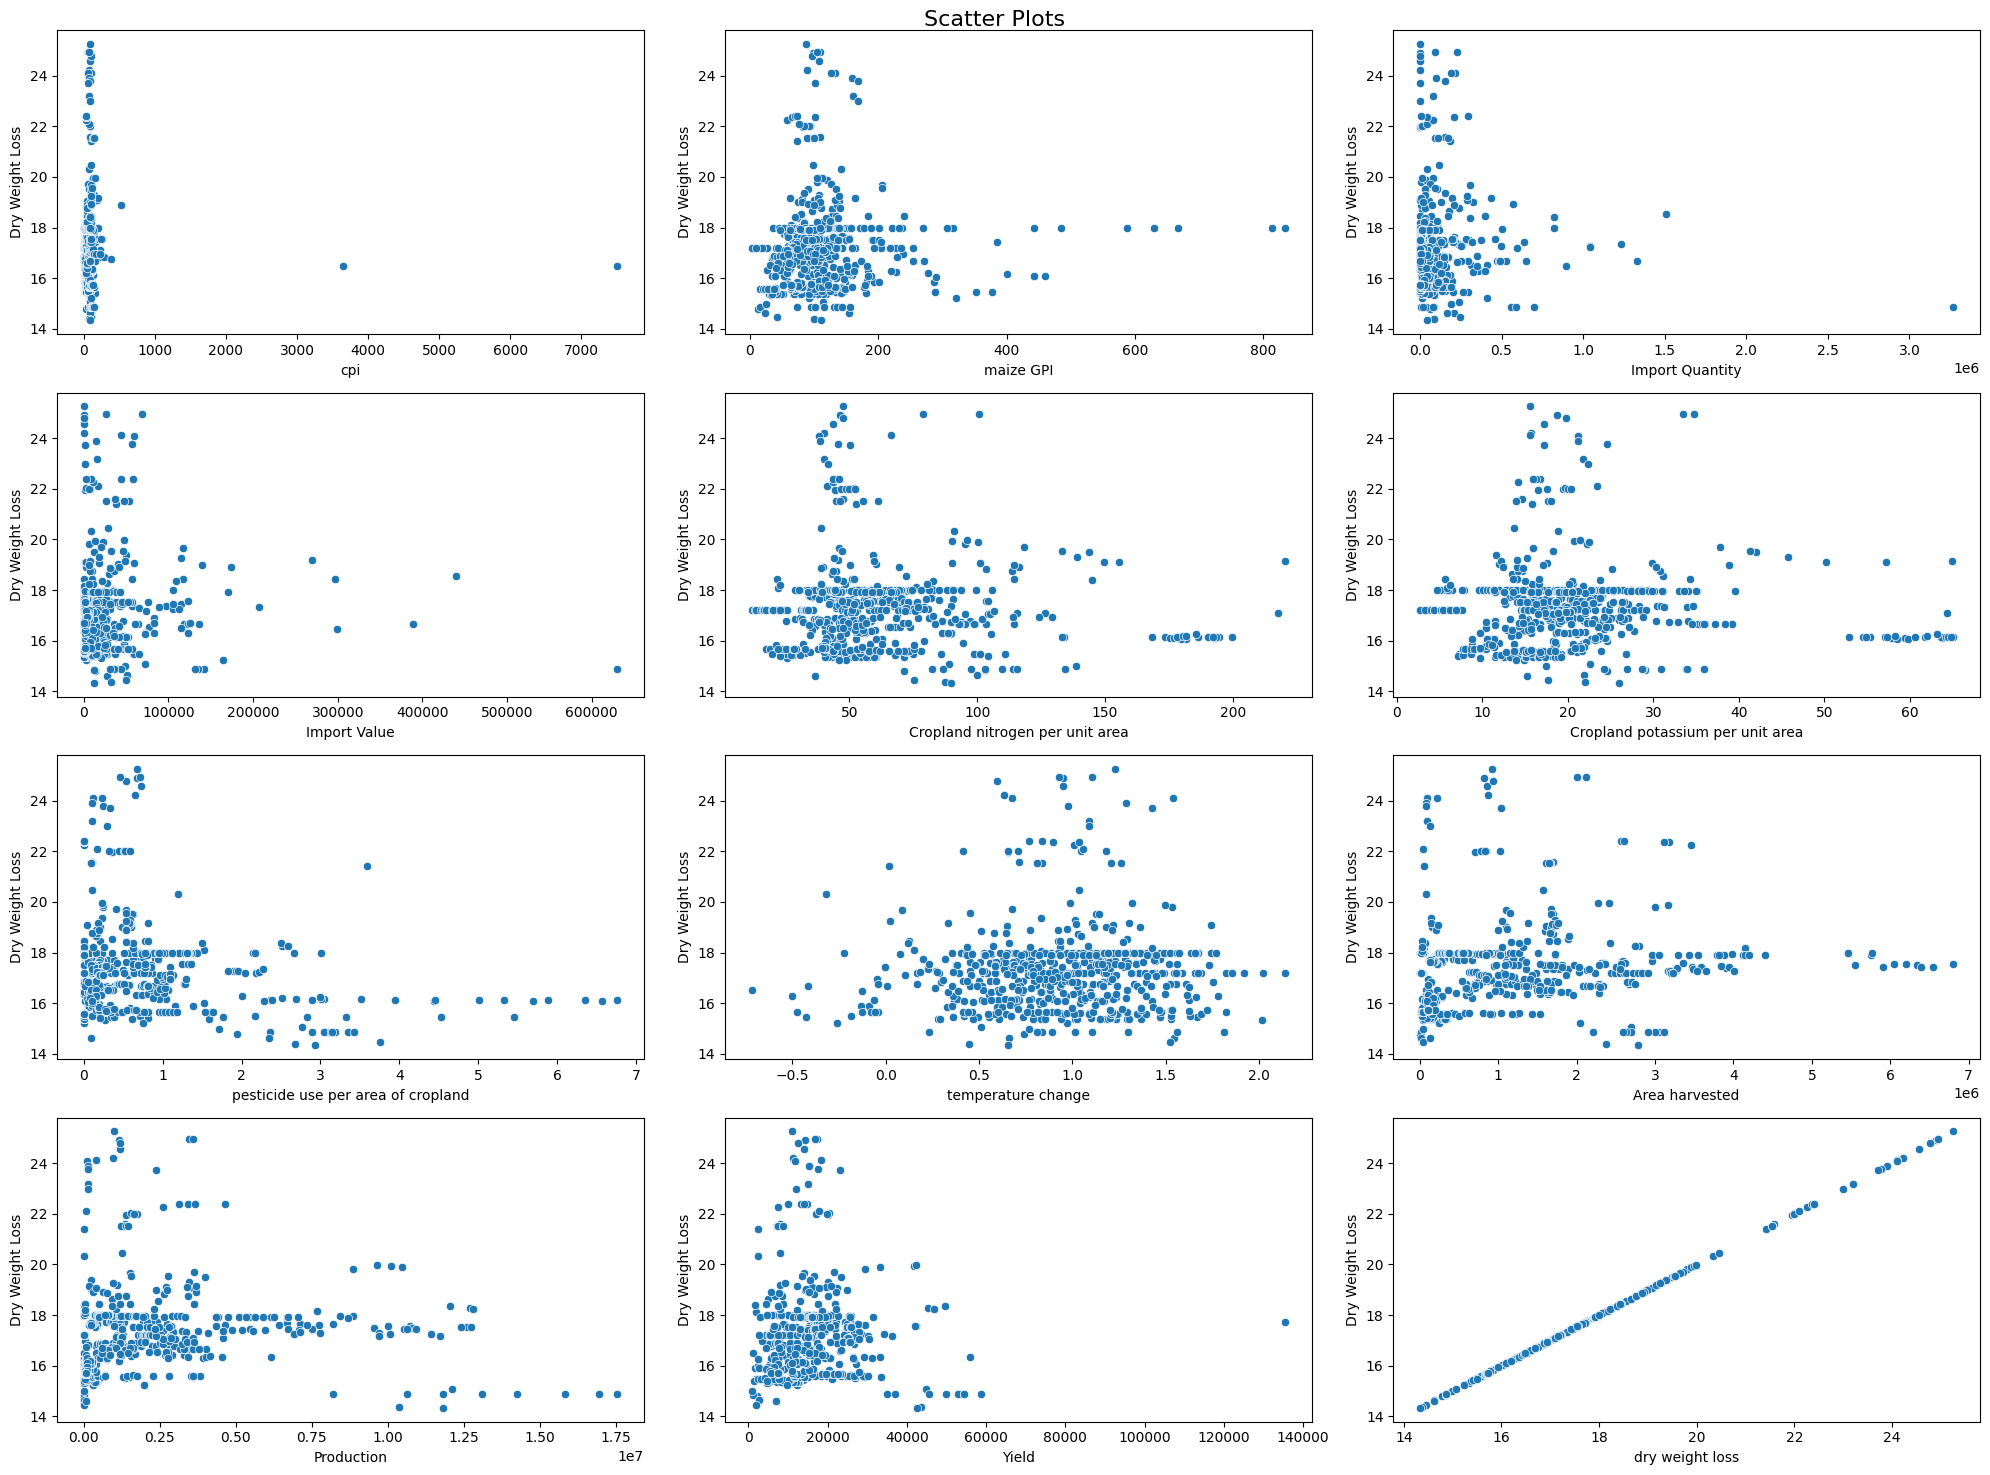

In [23]:
# setting the target column
target_column = "dry weight loss"
numeric_columns1 = numeric_columns.drop("dry weight loss", axis = 1)

# Create subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
fig.suptitle('Scatter Plots', fontsize=16)

# Create scatterplots for each selected column against the target using Seaborn
for i, column in enumerate(numeric_columns):
    row, col = i // 3, i % 3
    sns.scatterplot(x=column, y=target_column, data = data, ax=axes[row, col])
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel("Dry Weight Loss")
# Remove any extra empty subplot if the number of categories is odd
if len(column) % 3 == 1:
    fig.delaxes(axes[3, 2])

plt.tight_layout()
plt.show();

As shown by the scatter plots, we can see that none of them seem to show a linear relationship with the target variable. This could mean that there may be a polynomial relationship between the features and the target.

We will now create bar charts that will compare some features with the `dry weight loss` column. We will create the first two bar chart where we compare the top 5 countries with the highest and lowest dry weight loss respectively.

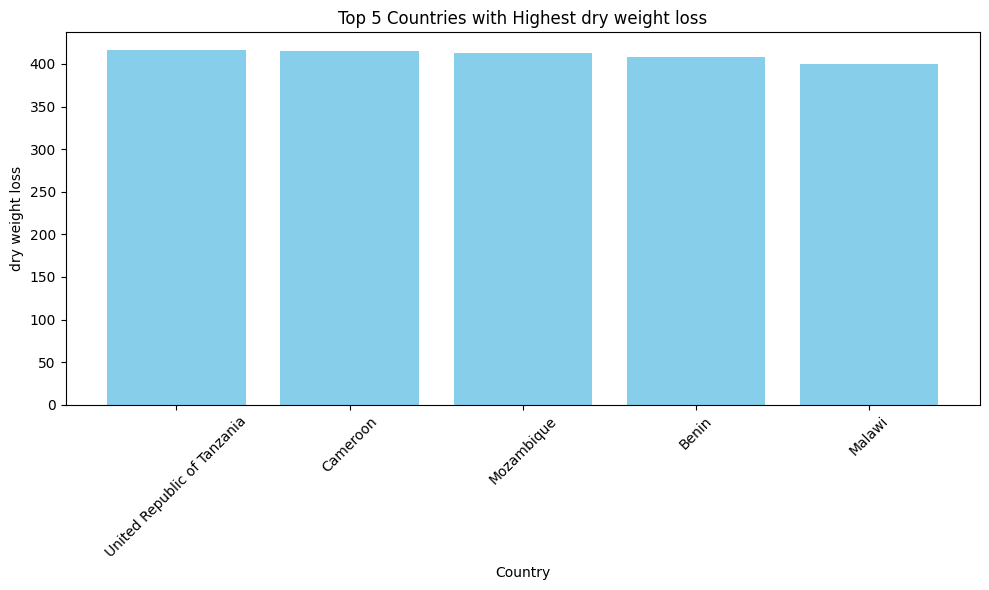

In [24]:
# Extracting 'country' and 'dry weight loss' columns
country_loss = data[['country', 'dry weight loss']]

# Grouping by country and summing the dry weight loss for each country
country_loss_sum = country_loss.groupby('country').sum()

# Sorting the countries by dry weight loss in descending order
country_loss_sorted = country_loss_sum.sort_values(by='dry weight loss', ascending=False)

# Selecting the top 5 countries with the highest dry weight loss
top_countries = country_loss_sorted.head()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries['dry weight loss'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('dry weight loss')
plt.title('Top 5 Countries with Highest dry weight loss')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

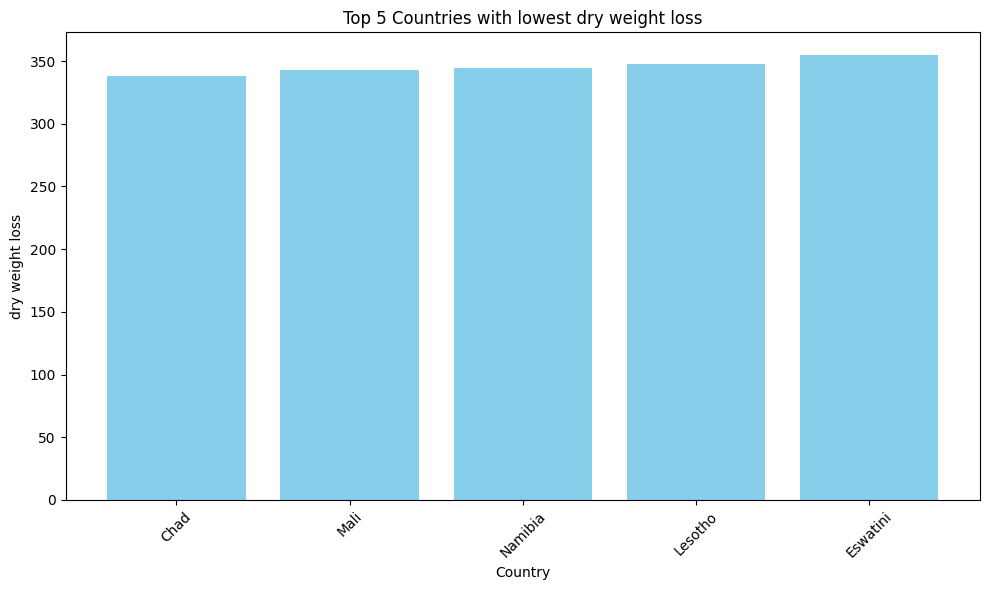

In [25]:
# Extracting 'country' and 'dry weight loss' columns
country_loss = data[['country', 'dry weight loss']]

# Grouping by country and summing the dry weight loss for each country
country_loss_sum = country_loss.groupby('country').sum()

# Sorting the countries by dry weight loss in ascending order
country_loss_sorted = country_loss_sum.sort_values(by='dry weight loss', ascending=True)

# Selecting the top 5 countries with the lowest dry weight losss
top_countries = country_loss_sorted.head()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries['dry weight loss'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('dry weight loss')
plt.title('Top 5 Countries with lowest dry weight loss')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the bar plots we can see that the countries with the highest dry weight loss were Tanzania, Cameroon, Mozambique, Benin and Malawi respectively. On the other hand, the countries with the lowest dry weight loss were Chad, Mali, Namibia, Lesotho and Eswatini in that order. We can also have a look at how the dry weight loss was distributed across the regions.

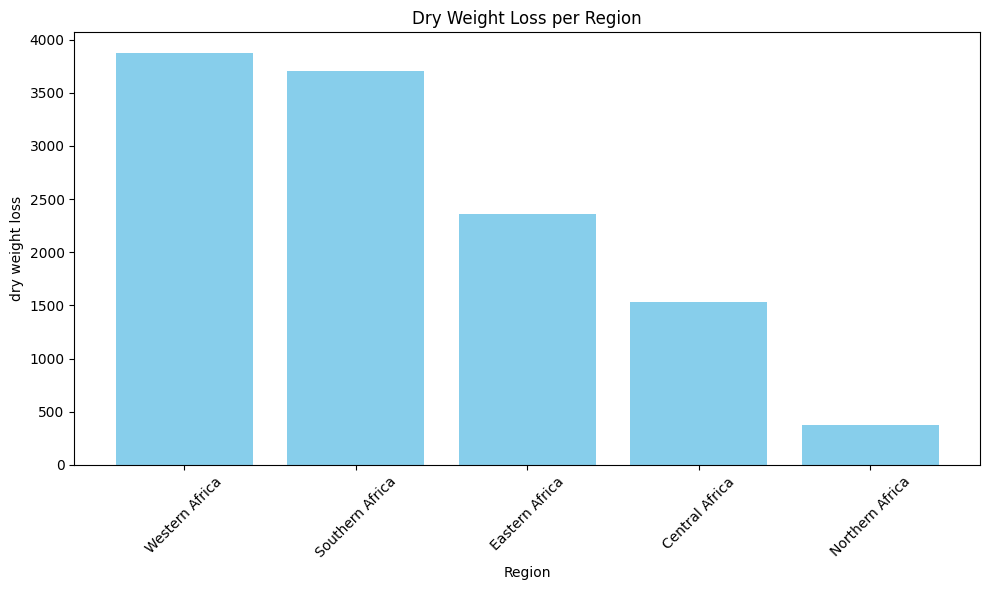

In [26]:
# Extracting 'region' and 'dry weight loss' columns
region_loss = data[['Region', 'dry weight loss']]

# Grouping by region and summing the dry weight loss for each region
region_loss_sum = region_loss.groupby('Region').sum()

# Sorting the regions by dry weight loss in ascending order
region_loss_sorted = region_loss_sum.sort_values(by='dry weight loss', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(region_loss_sorted.index, region_loss_sorted['dry weight loss'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('dry weight loss')
plt.title('Dry Weight Loss per Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

We can see that Western Africa is the region with the most dry weight loss in the continent and Northern Africa has the least amongst the regions. We will also create bar charts to compare maize production amongst the countries and regions. We will begin by getting the top 5 and bottom 5 producing countries.

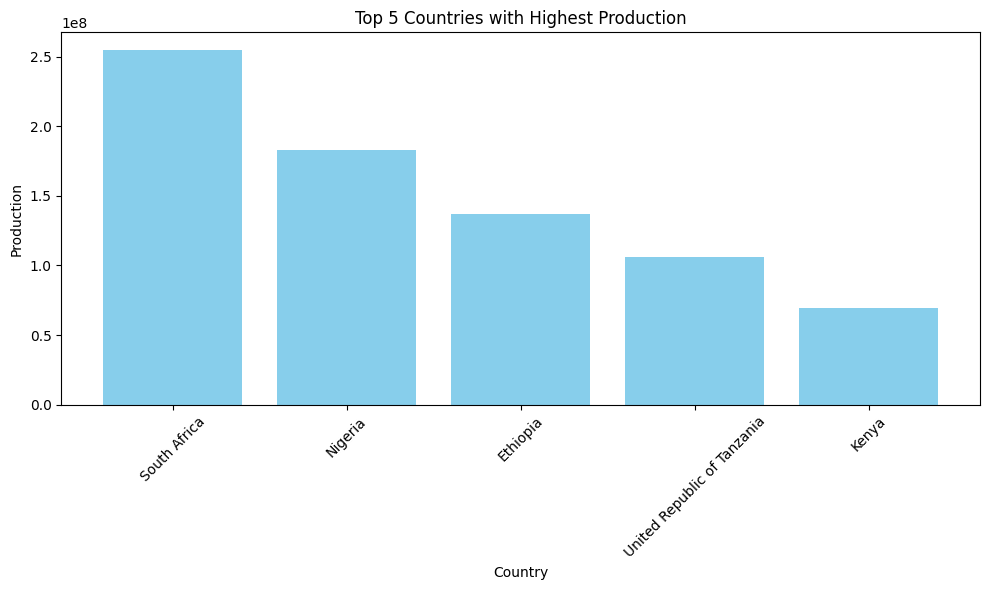

In [27]:
### Top 5 countries with highest production

# Extracting 'country' and 'Production' columns
country_production = data[['country', 'Production']]

# Grouping by country and summing the production for each country
country_production_sum = country_production.groupby('country').sum()

# Sorting the countries by production in descending order
country_production_sorted = country_production_sum.sort_values(by='Production', ascending=False)

# Selecting the top 5 countries with the highest production
top_countries = country_production_sorted.head()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_countries.index, top_countries['Production'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Production')
plt.title('Top 5 Countries with Highest Production')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

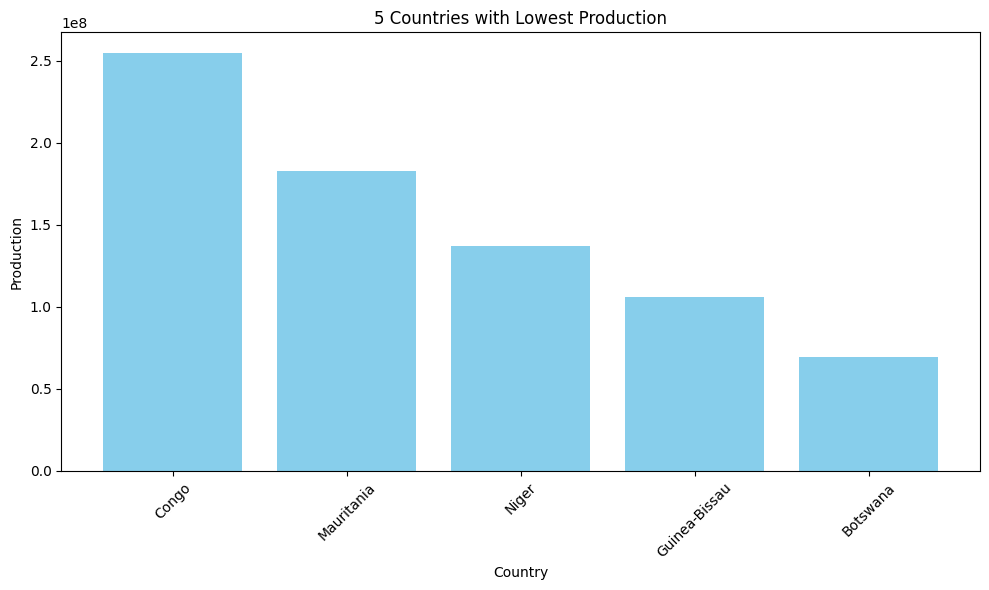

In [28]:
### 5 countries with lowest production

# Extracting 'country' and 'Production' columns
country_production = data[['country', 'Production']]

# Grouping by country and summing the production for each country
country_production_sum = country_production.groupby('country').sum()

# Sorting the countries by production in ascending order
country_production_sorted = country_production_sum.sort_values(by='Production', ascending=True)

# Selecting the top 5 countries with the lowest production
lowest_countries = country_production_sorted.head()

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(lowest_countries.index, top_countries['Production'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Production')
plt.title('5 Countries with Lowest Production')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the bar charts we can see that the countries with the highest maize production are South Africa, Nigeria, Ethiopia, Tanzania and Kenya. The ones with the lowest production were Congo, Mauritania, Niger, Guinea-Bissau and Botswana respectively. We can now have a look at the production per region.

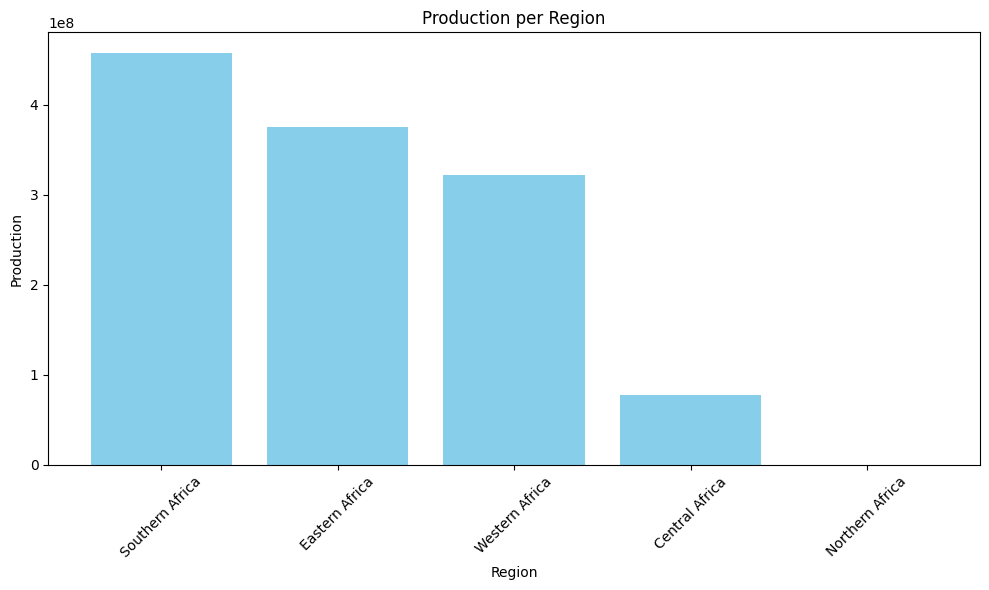

In [29]:
### Production per Region

# Extracting 'Region' and 'Production' columns
region_production = data[['Region', 'Production']]

# Grouping by region and summing the production for each country
region_production_sum = region_production.groupby('Region').sum()

# Sorting the regions by production in descending order
region_production_sorted = region_production_sum.sort_values(by='Production', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(region_production_sorted.index, region_production_sorted['Production'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Production')
plt.title('Production per Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

We can see that Southern Africa produces a lot of maize and Northern Africa produces the least amongst the regions. We can also have a look at the yields in the countries and the regions. We will begin by looking at the top and bottom 5 countries in terms of yield.

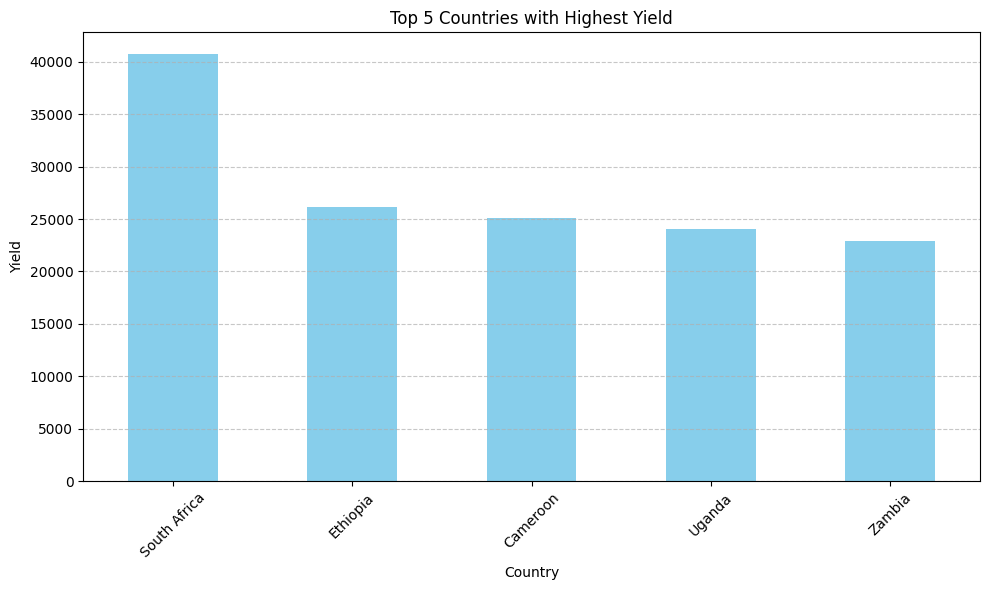

In [30]:
### Top 5 countries with highest yield

# Group data by country and calculate the mean yield for each country
country_yield = data.groupby('country')['Yield'].mean().sort_values(ascending=False)

# Select top 5 countries with the highest yield
top_countries_yield = country_yield.head()

# Create bar plot
plt.figure(figsize=(10, 6))
top_countries_yield.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Highest Yield')
plt.xlabel('Country')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

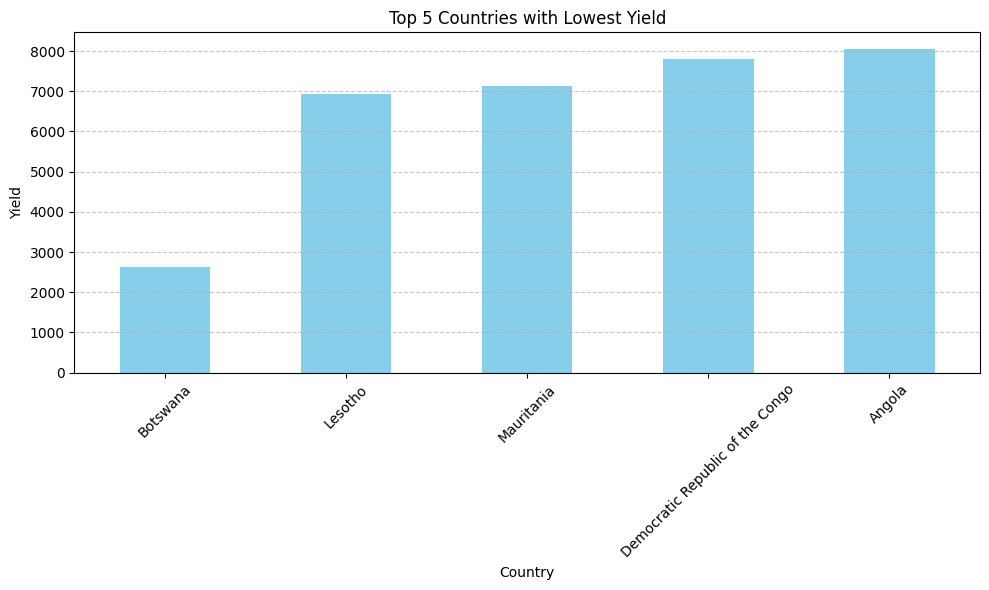

In [31]:
### 5 countries with lowest yield

# Group data by country and calculate the mean yield for each country
country_yield = data.groupby('country')['Yield'].mean().sort_values(ascending=True)

# Select the 5 countries with the lowest yield
lowest_countries_yield = country_yield.head()

# Create bar plot
plt.figure(figsize=(10, 6))
lowest_countries_yield.plot(kind='bar', color='skyblue')
plt.title('Top 5 Countries with Lowest Yield')
plt.xlabel('Country')
plt.ylabel('Yield')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

The countries with the highest yields are South Africa, Ethiopia, Cameroon, Uganda and Zambia respectively whereas the ones with the lowest yields were Botswana, Lesotho, Mauritania, Democratic Republic of Congo and Angola. We can also have a look at the regions and their yields.

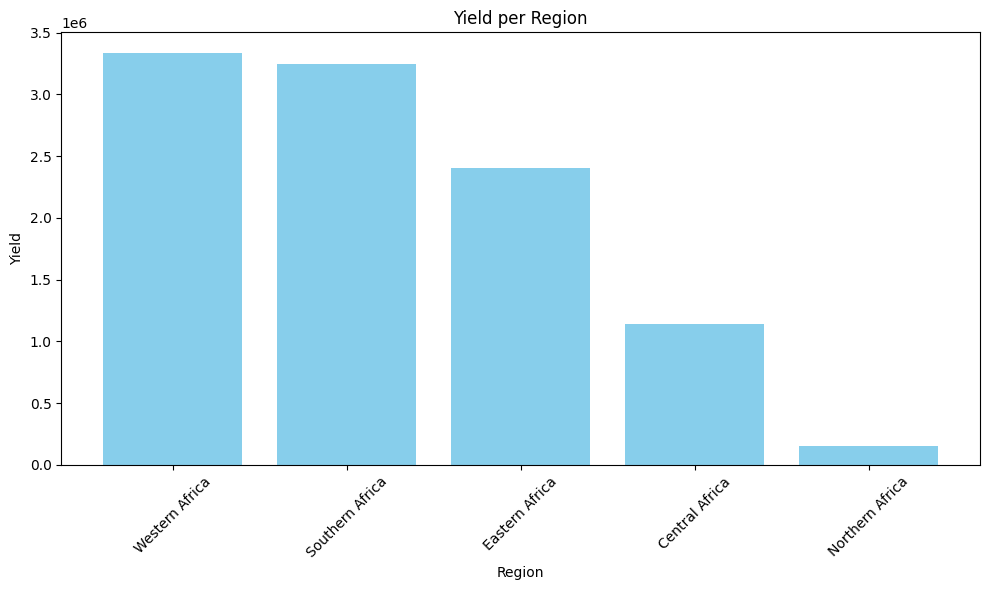

In [32]:
### Yield per Region

# Extracting 'Region' and 'Yield' columns
region_production = data[['Region', 'Yield']]

# Grouping by region and summing the yield for each country
region_production_sum = region_production.groupby('Region').sum()

# Sorting the regions by yield in descending order
region_production_sorted = region_production_sum.sort_values(by='Yield', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(region_production_sorted.index, region_production_sorted['Yield'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Yield')
plt.title('Yield per Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

Here we can see that Western Africa has the highest yields whereas Nothern Africa has the lowest yields.
We can also have a look at the area harvested within the countries and regions.

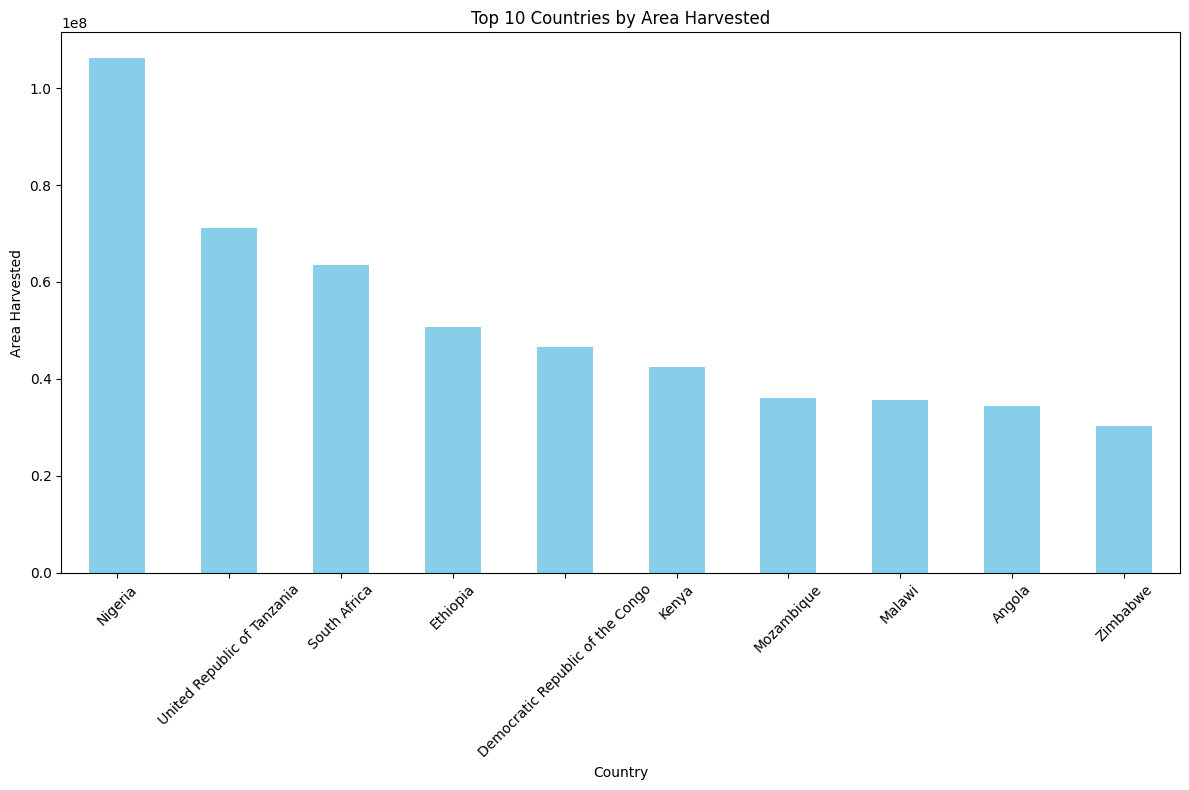

In [33]:
# Group data by 'country' and sum the 'Area harvested' for each country
area_harvested_by_country = data.groupby('country')['Area harvested'].sum()

# Sort the results in descending order
area_harvested_by_country_sorted = area_harvested_by_country.sort_values(ascending=False)

# Select the top 10 countries with the highest area harvested
top_10_countries = area_harvested_by_country_sorted.head(10)

# Visualize the top 10 countries vs. area harvested using a bar plot
plt.figure(figsize=(12, 8))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries by Area Harvested')
plt.xlabel('Country')
plt.ylabel('Area Harvested')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

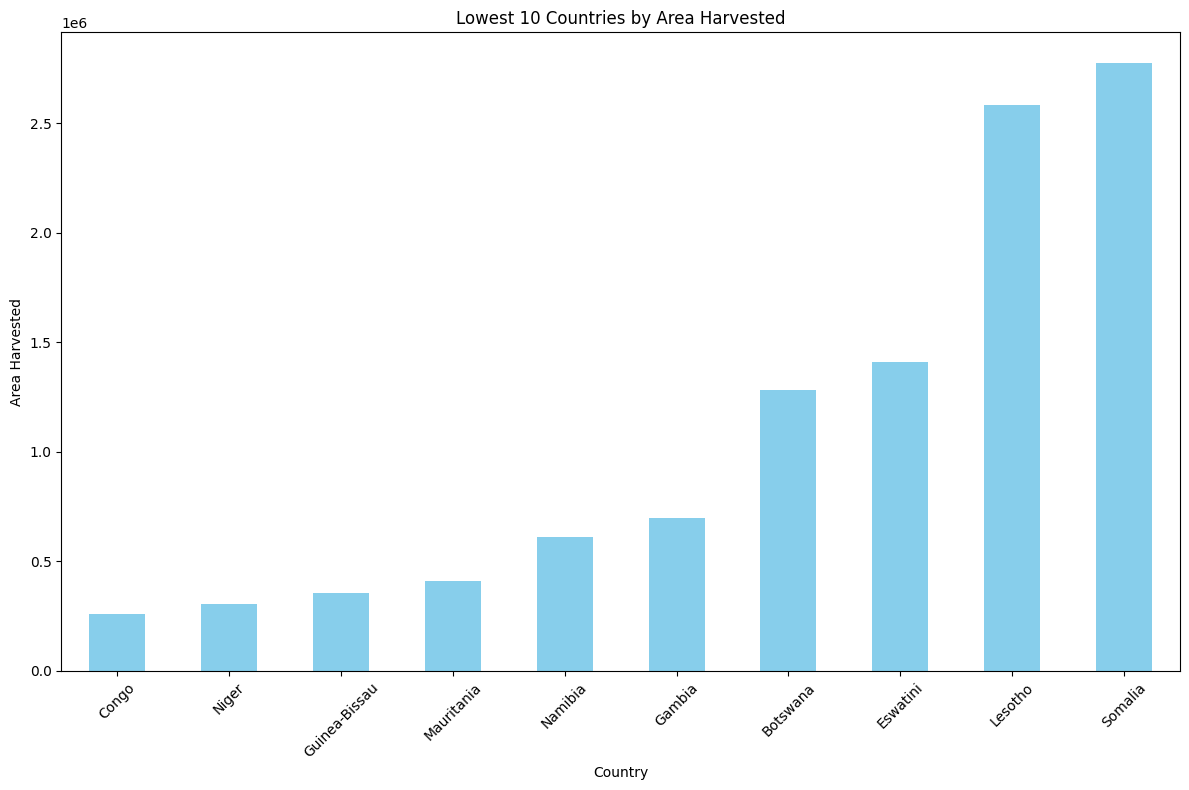

In [34]:
# Group data by 'country' and sum the 'Area harvested' for each country
area_harvested_by_country = data.groupby('country')['Area harvested'].sum()

# Sort the results in ascending order
area_harvested_by_country_sorted = area_harvested_by_country.sort_values(ascending=True)

# Select the lowest 10 countries with the highest area harvested
lowest_10_countries = area_harvested_by_country_sorted.head(10)

# Visualize the lowest 10 countries vs. area harvested using a bar plot
plt.figure(figsize=(12, 8))
lowest_10_countries.plot(kind='bar', color='skyblue')
plt.title('Lowest 10 Countries by Area Harvested')
plt.xlabel('Country')
plt.ylabel('Area Harvested')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

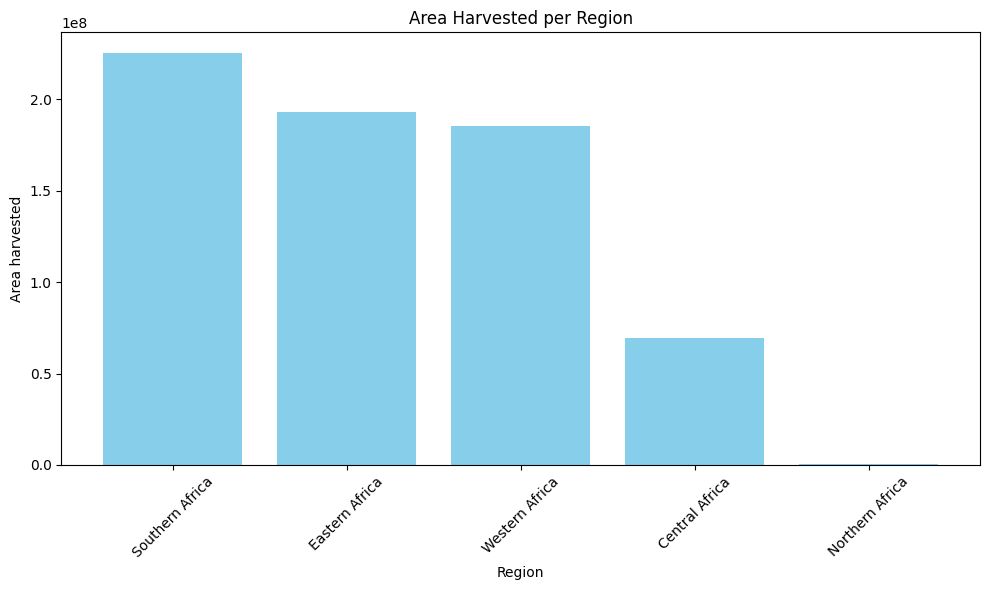

In [35]:
### Area Harvested per Region

# Extracting 'Region' and 'Area Harvested' columns
region_production = data[['Region', 'Area harvested']]

# Grouping by region and summing the area harvested for each country
region_production_sum = region_production.groupby('Region').sum()

# Sorting the regions by area harvested in descending order
region_production_sorted = region_production_sum.sort_values(by='Area harvested', ascending=False)

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(region_production_sorted.index, region_production_sorted['Area harvested'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Area harvested')
plt.title('Area Harvested per Region')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

From the plots we can see that Nigeria has the largest area harvested and Congo has the smallest. For the regions, Southern Africa has the largest whereas Northern Africa has the smallest. With this analysis we can now head over to the multivariate analysis.

### Multivariate Analysis.

In this section we will only focus on correlation amongst the features. We will do this by creating a heatmap that will show how correlated the features are.

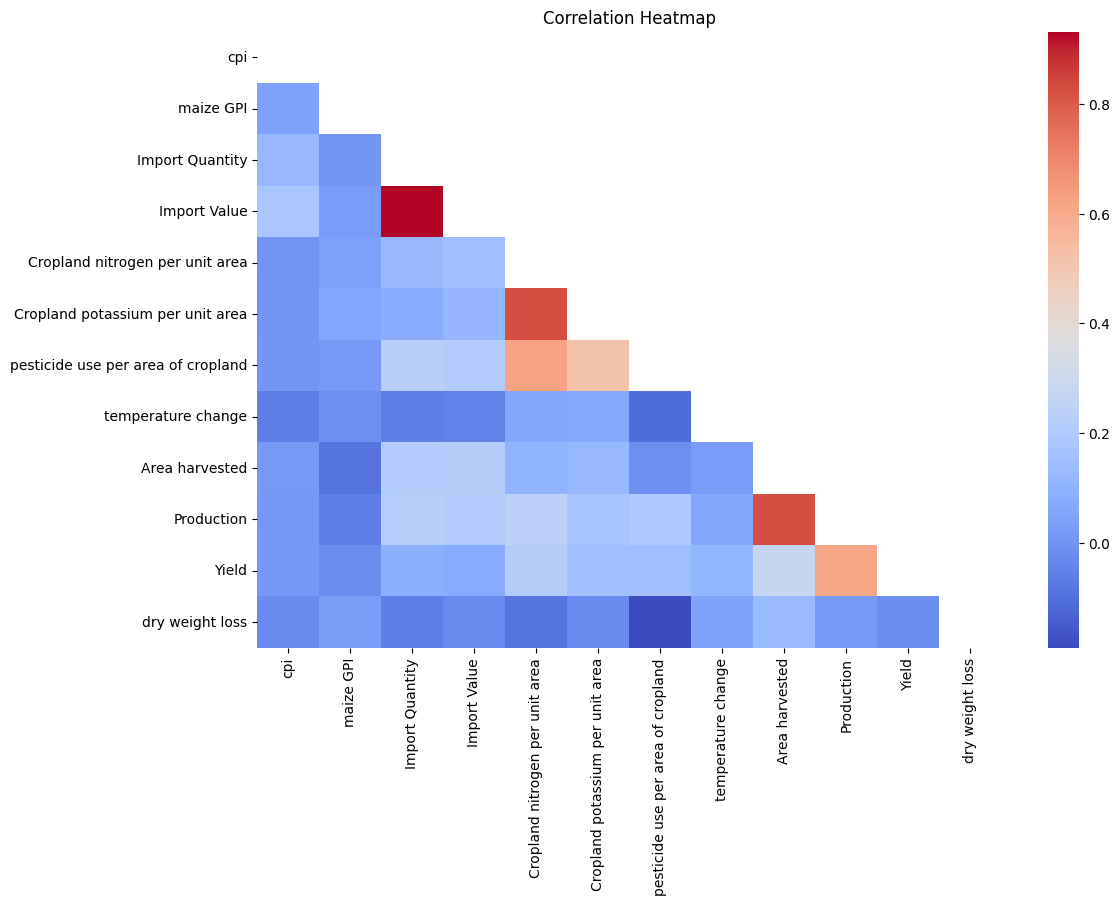

In [36]:
# Selecting the columns
numeric_columns = data[['cpi', 'maize GPI', 'Import Quantity', 'Import Value','Cropland nitrogen per unit area', 'Cropland potassium per unit area','pesticide use per area of cropland', 'temperature change', 'Area harvested','Production', 'Yield', 'dry weight loss']]

# Creating a correlation matrix
correlation_matrix = numeric_columns.corr()
# Create a mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
# Creating the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", mask=mask,)
plt.title('Correlation Heatmap')
plt.show();

As we can see, there is a strong positive correlation between these columns:

* `Import Value` and `Import Quantity`
* `cropland nitrogen per unit area` and `cropland potassium per unit area`
* `Production` and `Area harvested`

The others have correlation below 0.65.

With this analysis, we can now head over to time series analysis.

### Time Series Analysis

Here, we will focus on analysing the data with respect to time. We will create a dataframe and put the `year` column as our index.

In [37]:
# Copying the dataframe.
ts = data.copy()
# Setting 'year' as the index
ts['year'] = pd.to_datetime(ts['year'], format='%Y')
# Dropping the null values
ts = ts.dropna(subset=['dry weight loss'])
# Grouping the dataframe
ts = ts.groupby('year').aggregate({'dry weight loss':'mean'})
# Checking the dataset
print(ts.shape)
ts.head()

(22, 1)


,dry weight loss
year,
2000-01-01,16.969426
2001-01-01,16.938052
2002-01-01,16.937639
2003-01-01,17.049377
2004-01-01,17.152042


Now that our time series dataframe is created, we can now create a histogram to check the distribution of the time series data

array([[<Axes: title={'center': 'dry weight loss'}>]], dtype=object)

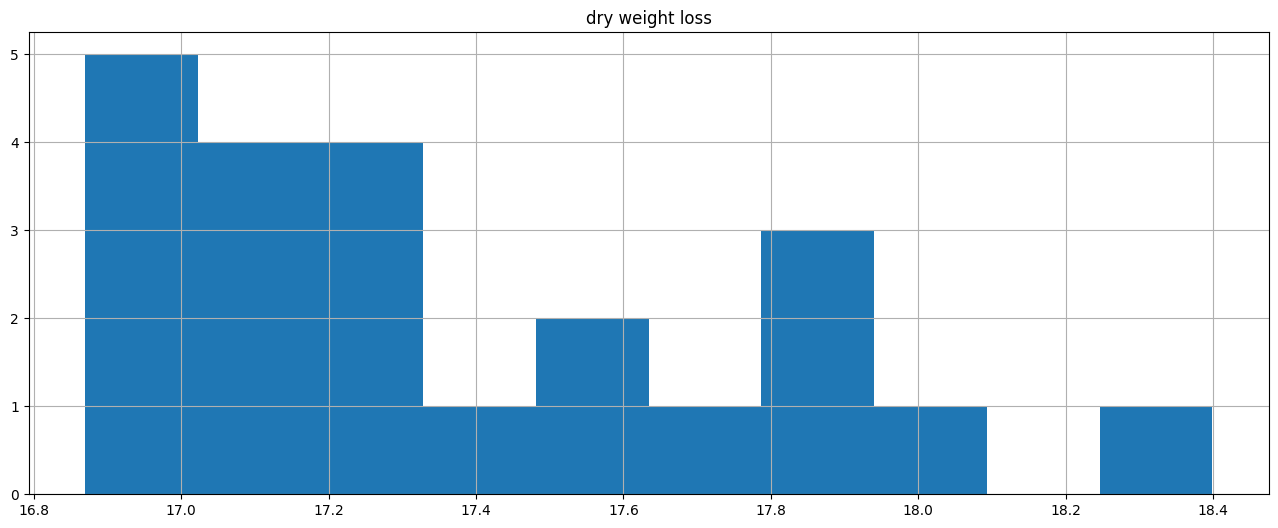

In [38]:
# Time series histogram
ts.hist(figsize=(16,6))

From the histogram we can see that the data is not normally distributed. We can go ahead and create a line plot of our data.

<Axes: xlabel='year'>

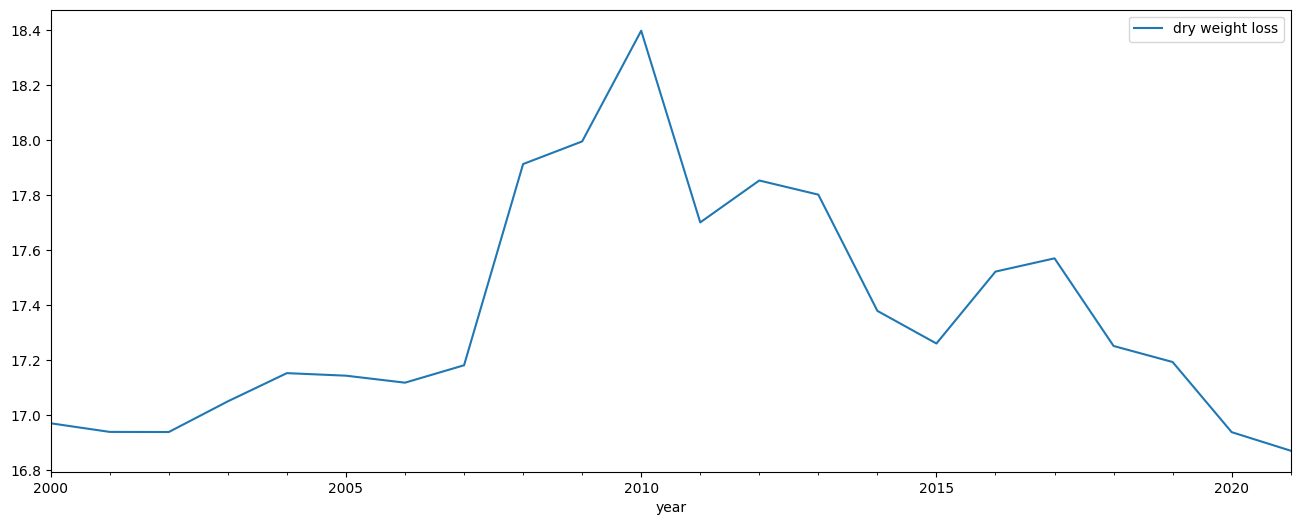

In [39]:
# Time series line plot
ts.plot(figsize=(16,6))

It seems that there was an upward trend seen upto 2010 and after 2010 there seems to be a downward trend. We can investigate further on whether our data has seasonality or not.

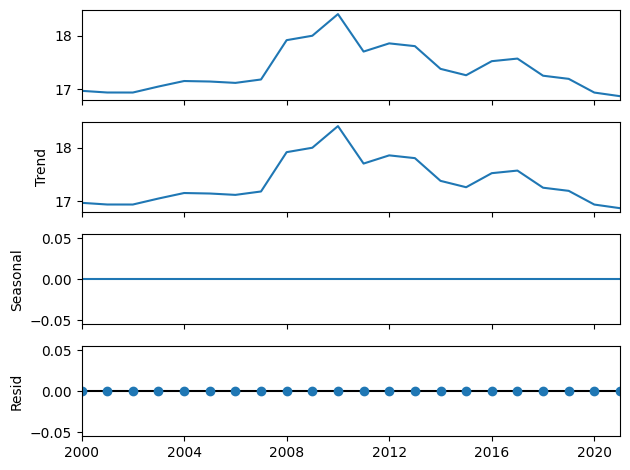

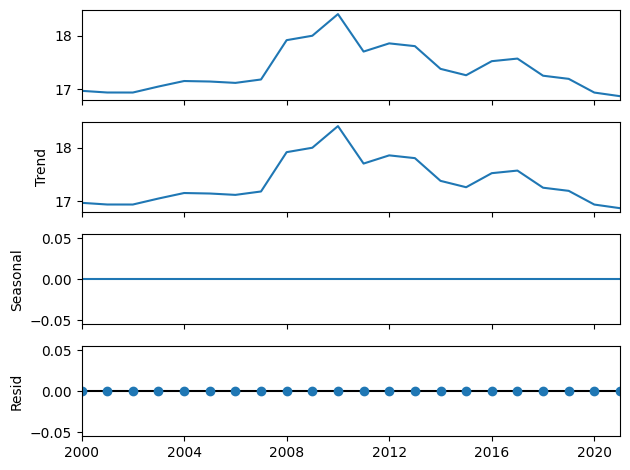

In [40]:
# Checking for seasonality and trend
decomposition = seasonal_decompose(ts)
decomposition.plot()

From the plot we can see that the trend is similar to the line plot we created before. It is also noticeable that there is no seasonality with the data and the residuals follow a straight line. We can also investigate the rolling mean and statistics of the data. This will help to identify if our data is stationary.

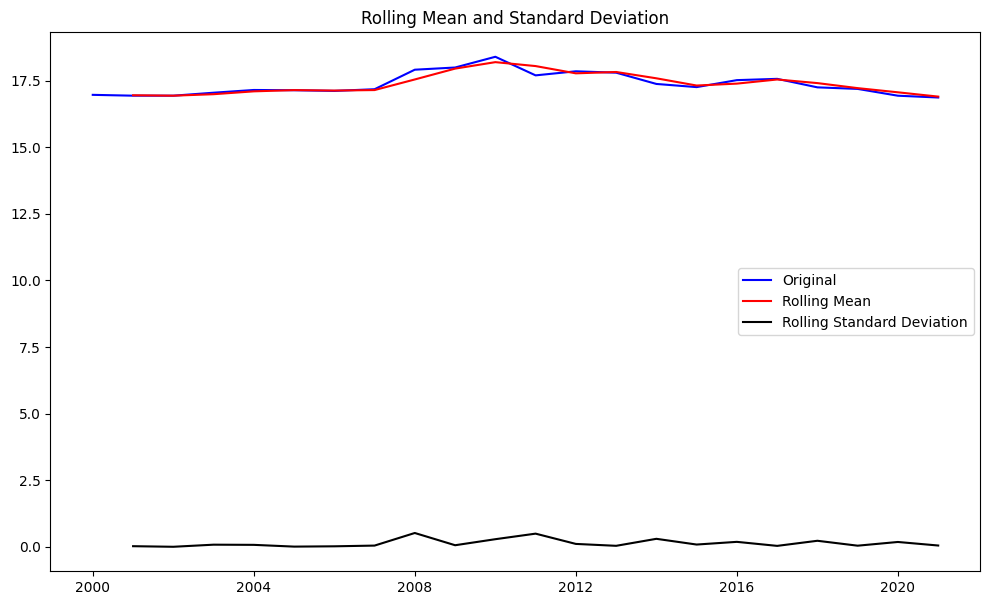

In [41]:
# Define roll_mean and roll_std
roll_mean = ts.rolling(window=2, center=False).mean()
roll_std = ts.rolling(window=2, center=False).std()

# Plot the rolling statistics
fig = plt.figure(figsize=(12,7))
plt.plot(ts, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False);

We can investige this phenomenon further by using the Dickey-Fuller test.

In [42]:
# Conducting the Dickey-Fuller test
dftest = adfuller(ts)
dfoutput = pd.Series(dftest[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

# Printing out the results
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(f'Results of Dickey-Fuller Test:\n\n{dfoutput}')

Results of Dickey-Fuller Test:

Test Statistic                 -1.534796
p-value                         0.516233
#Lags Used                      0.000000
Number of Observations Used    21.000000
Critical Value (1%)            -3.788386
Critical Value (5%)            -3.013098
Critical Value (10%)           -2.646397
dtype: float64


From the rolling statistics we can see that the rolling mean follows the same trend as the data. From the Dickey-Fuller test we can see that the p-value is 0.516 which is greater than our set alpha of 0.05 which means we will fail to reject the null hypothesis. They both prove the fact that the data is not stationary.

With all of the analysis done it can be assumed that our data is ready for modeling. However, it isn't. In fact it is too small for time series modeling. We need to downsample the data to give daily results and use the `interpolate` period to fill the null values.

In [43]:
# Resampling the data to daily
ts = ts.resample('D').asfreq()
# Filling the null values
ts = ts.interpolate(method='linear', axis=0, limit_direction='forward')
ts.shape

(7672, 1)

With a shape of 7672 rows, our data is now enough for time  but we need to investigate and check whether the new dataset has the same characterestics as the main dataset.

<Axes: xlabel='year'>

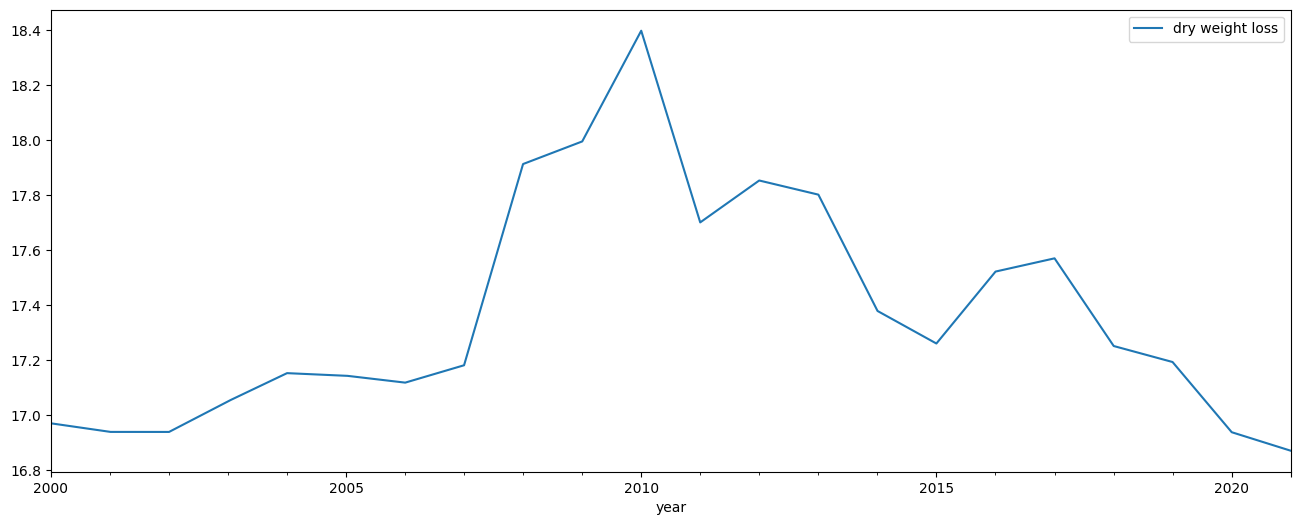

In [44]:
# Plotting the line plot
ts.plot(figsize=(16,6))

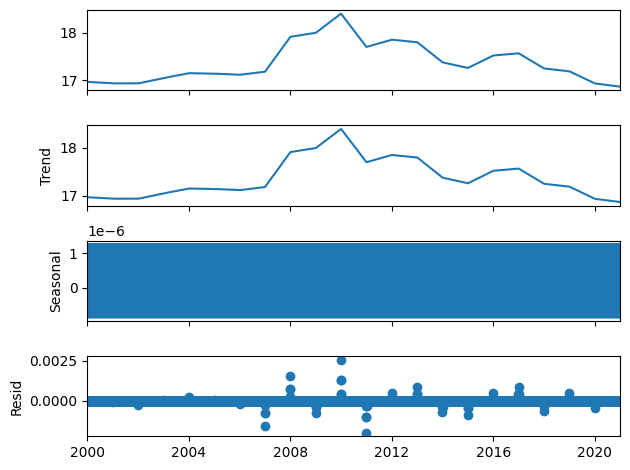

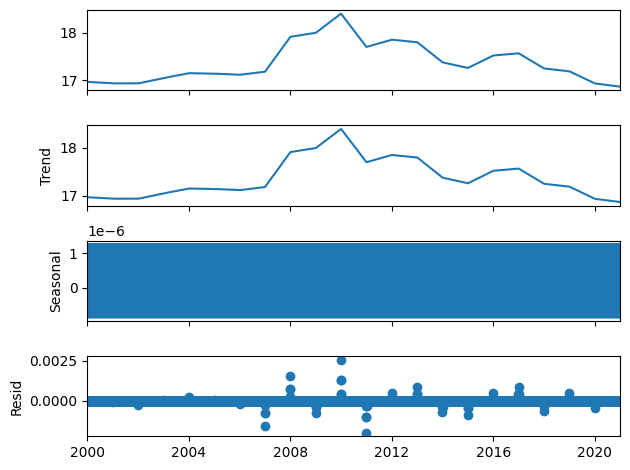

In [45]:
# Checking for trend and seasonality
decomposition = seasonal_decompose(ts)
decomposition.plot()

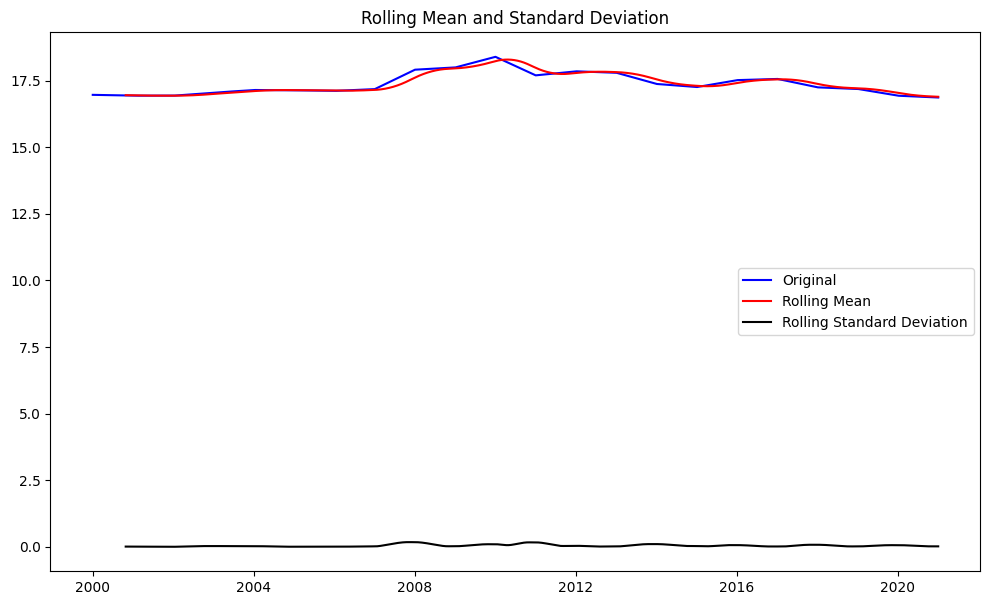

In [46]:
# Checking the rolling statistics

# Defining roll_mean and roll_std
roll_mean2 = ts.rolling(window=300, center=False).mean()
roll_std2 = ts.rolling(window=300, center=False).std()

# Plotting the rolling statistics
fig = plt.figure(figsize=(12,7))
plt.plot(ts, color='blue', label='Original')
plt.plot(roll_mean2, color='red', label='Rolling Mean')
plt.plot(roll_std2, color='black', label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False);

In [47]:
# Conducting the Dickey-Fuller test
dftest2 = adfuller(ts)
dfoutput2 = pd.Series(dftest2[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])

# Printing the results
for key, value in dftest2[4].items():
    dfoutput2['Critical Value (%s)'%key] = value

print(f'Results of Dickey-Fuller Test:\n\n{dfoutput2}')

Results of Dickey-Fuller Test:

Test Statistic                   -2.161660
p-value                           0.220454
#Lags Used                        1.000000
Number of Observations Used    7670.000000
Critical Value (1%)              -3.431203
Critical Value (5%)              -2.861917
Critical Value (10%)             -2.566971
dtype: float64


It looks like both datasets have similar characteristics, only that the p-value has reduced to 0.22. We can now head to the modeling phase.

## Modelling

In this stage, we will be creating the models we had stated in our objectives. However, based on the EDA we conducted, we have to conduct data preprocessing which will help improve the accuracy of our models. 

### Data Preprocessing.

The first data preprocessing we will conduct is feature selection which will be useful to determine the features we will need to drop. We will focus on all the numeric features except for `year`.

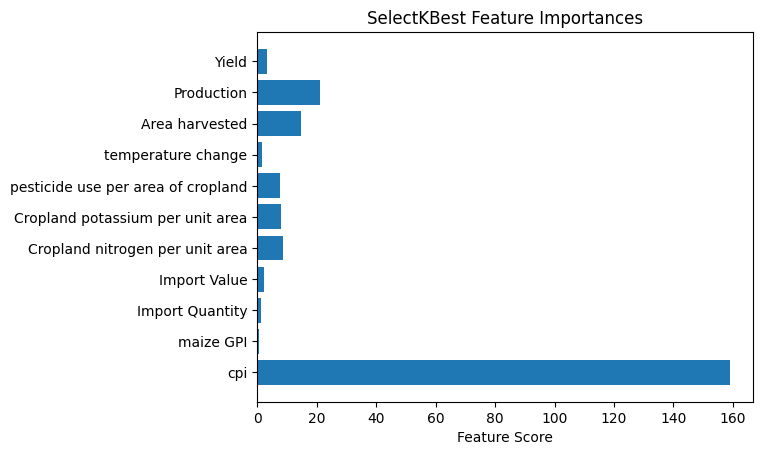

In [48]:
# Splitting data into X_numeric and y
X_numeric = data[['cpi', 'maize GPI', 'Import Quantity', 'Import Value','Cropland nitrogen per unit area', 'Cropland potassium per unit area','pesticide use per area of cropland', 'temperature change', 'Area harvested','Production', 'Yield']]
y = data['dry weight loss']

# Fitting SelectKBest
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X_numeric, y)
feature_scores = selector.scores_
feature_names = X_numeric.columns

# Creating a bar chart to show importance.
plt.barh(feature_names, feature_scores)
plt.xlabel('Feature Score')
plt.title('SelectKBest Feature Importances')
plt.show()

From the barplot, we can see that CPI has the highest importance to dry weight loss. Some of them had importance but maize GPI had the least importance followed by import quantity and temperature change. We will drop these columns and include cropland pottasium per unit area and area harvested. This is because they were some of the columns that exhibited high correlation with other columns and may lead to multicollonearity when modelling. After dropping them we will convert each column to the fourth root and use that as our transformation.

In [49]:
# Selecting the necessary columns
X_fourth = X_numeric[['cpi', 'Import Value','Cropland nitrogen per unit area', 'pesticide use per area of cropland', 'Production', 'Yield']]
# Converting their values to the fourth root
for column in X_fourth.columns:
    X_fourth[column] = X_fourth[column] ** 0.25

With that sorted, we can now proceed to use `pd.dummies` for OneHotEncoding. We will use the `Region` column since it has fewer classes compared to the `country` column. We will then combine the `X_poly` and `X_cat` columns.

In [50]:
# Selecting the column
X_cat = data['Region']
# OneHotEncoding 
X_cat = pd.get_dummies(X_cat, columns=['Region'], drop_first=True, dtype=int)
# Combining the two dataframes
X_transformed = pd.concat([X_fourth, X_cat], axis=1)

Since that is done we will conclude the data preprocessing for the first dataset by doing some feature engineering. We will focus on the `year` column. Since we will focus on trying to forecast our time series data up to 2050, we will be subtracting each year in our dataset from 2050.

In [51]:
# Subtracting the data
data['years_to_2050'] = 2050 - data['year']
# combining to our transformed dataset
X_transformed = pd.concat([X_transformed, data['years_to_2050']], axis=1)

We can now split our data into training and testing datasets.

In [52]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.25, random_state=123)

Now our dataset is ready for modelling. We will now head over to the time series data. We will need to remove the trend from the data and make it stationary for the data to be suitable for modeling. We will begin by subtracting the weighted exponential rolling mean from our data. We will be checking whether stationarity has been achieved using the rolling statistics and the Dickey-Fuller test.

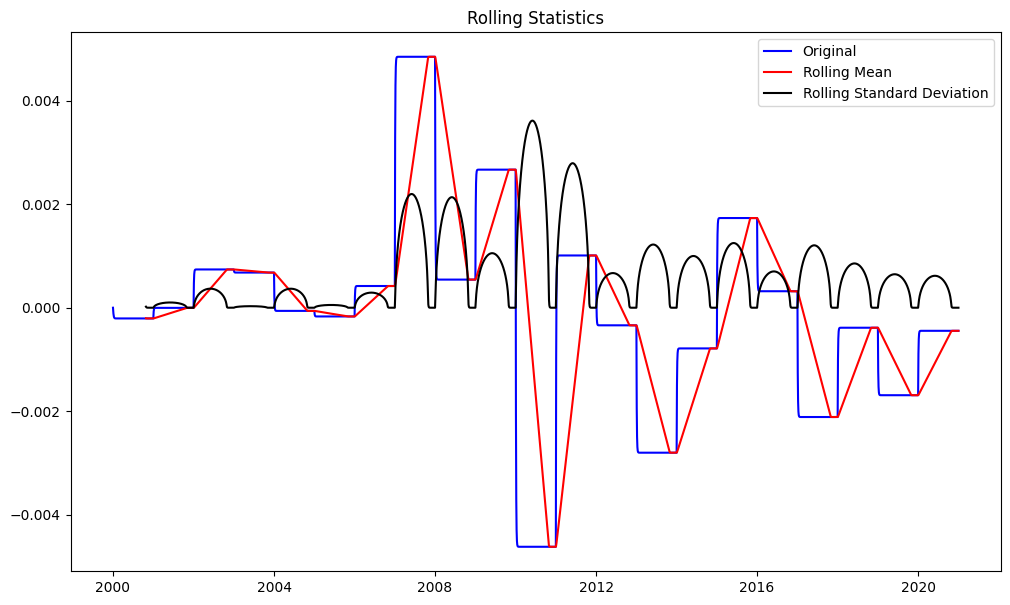

In [53]:
# Subtracting the weighted rolling mean

exp_rolling_mean = ts.ewm(halflife=2).mean()
ts_minus_exp_roll_mean = ts - exp_rolling_mean
roll_mean2 = ts_minus_exp_roll_mean.rolling(window=300, center=False).mean()
roll_std2 = ts_minus_exp_roll_mean.rolling(window=300, center=False).std()

#Plot
fig = plt.figure(figsize=(12,7))
plt.plot(ts_minus_exp_roll_mean, color='blue', label='Original')
plt.plot(roll_mean2, color='red', label='Rolling Mean')
plt.plot(roll_std2, color='black', label='Rolling Standard Deviation')

plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

In [54]:
#Dickey-Fuller Test
dftest = adfuller(ts_minus_exp_roll_mean)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                   -3.401238
p-value                           0.010917
#Lags Used                        1.000000
Number of Observations Used    7670.000000
Critical Values (1%)             -3.431203
Critical Values (5%)             -2.861917
Critical Values (10%)            -2.566971
dtype: float64


Even though the p-value is below 0.05, the graph shows that stationarity has not been achieved. We can achieve it by differencing the data.

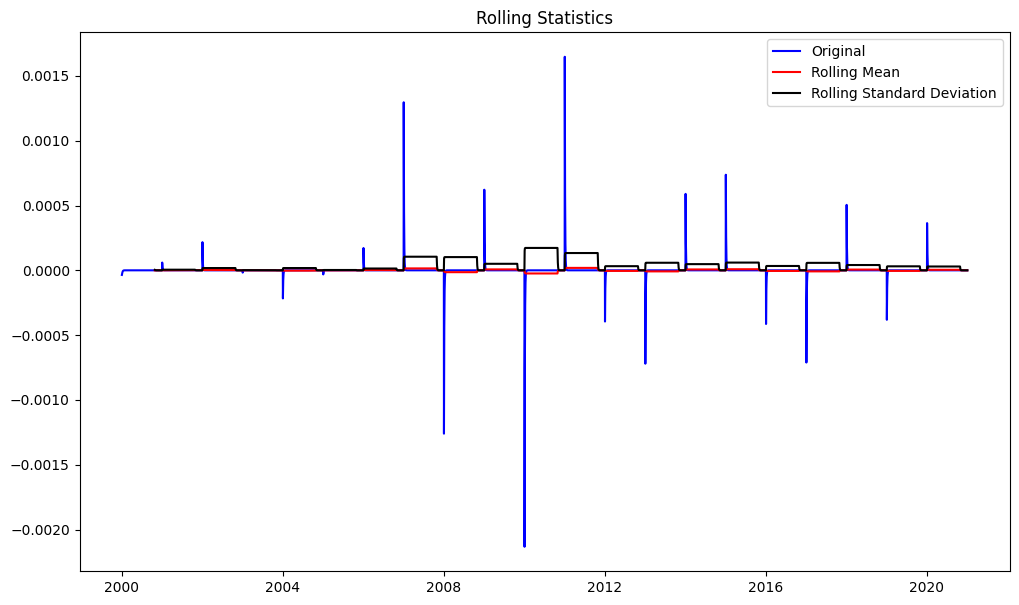

In [55]:
#We start with a differencing of one
ts_diff = ts_minus_exp_roll_mean.diff(periods=1).dropna()

#Plotting to see if the data is stationary

# Calculate rolling mean and rolling standard deviation
roll_mean2 = ts_diff.rolling(window=300, center=False).mean()
roll_std2 = ts_diff.rolling(window=300, center=False).std()

#Plot
fig = plt.figure(figsize=(12,7))
plt.plot(ts_diff, color='blue', label='Original')
plt.plot(roll_mean2, color='red', label='Rolling Mean')
plt.plot(roll_std2, color='black', label='Rolling Standard Deviation')

plt.legend(loc='best')
plt.title('Rolling Statistics')
plt.show(block=False);

In [56]:
#Dickey-Fuller Test
dftest = adfuller(ts_diff)
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Values (%s)'%key] = value

print('Results of Dickey-Fuller test: \n')
print(dfoutput)

Results of Dickey-Fuller test: 

Test Statistic                  -36.271567
p-value                           0.000000
#Lags Used                        0.000000
Number of Observations Used    7670.000000
Critical Values (1%)             -3.431203
Critical Values (5%)             -2.861917
Critical Values (10%)            -2.566971
dtype: float64


From both the graph and the test, we can see that our data has achieved stationarity and can be used for modeling. We will now have to split the data into training and testing datasets.

In [57]:
#Data splitting at 75% of the data
train_size = int(len(ts_diff) * 0.75) 
ts_train, ts_test = ts_diff.iloc[:train_size], ts_diff.iloc[train_size:]
print(ts_train.shape)
print(ts_test.shape)

(5753, 1)
(1918, 1)


We can now complete the data preprocessing stage by creating functions that will be useful for model evaluation.

In [58]:
#Function to calculate rmse and mae
def regression_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'RMSE: {rmse}\nMAE: {mae}')

In [59]:
#Function to calculate rmse and mae of time series models
def time_series_metrics(y_test, y_pred):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    print(f'RMSE: {rmse}\nMAE: {mae}')

Now that our evaluation models are done, we can now head over to inferential regression.

### Inferential Regression.

We will now head over to inferential regression where we will be focusing on getting more information on the relationship between the features and the target variable. We will be creating two models per algorithm where one of them will be the baseline. Evaluation will bw based on the RMSE and MAE score of the model. After achieving the best model based on the two metrics, we will get the R-Squared and Adjusted R-Squared of the model and plot its residuals. We will begin the modeling by using a baseline linear regression model.

In [60]:
# Creating the model pipeline
pipe1 = Pipeline([('scaler', StandardScaler()), 
                  ('lin', LinearRegression())])
# Fitting the model
pipe1.fit(X_train, y_train)
# Predicting the test features
y_pred1 = pipe1.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred1)

RMSE: 1.4992242219658478
MAE: 1.0410789779412097


From the results, we can see that the model has an RMSE of about 1.5 and a MAE of about 1.0. These values are still large compared to the data since linear regression depends on independence, no multicollinearity, normality and homoscedasticity assumptions which may not hold in this dataset. We will try and improve the model's metrics by using regularization i.e. Ridge and Lasso regression. We will begin with ridge and create a baseline model.

In [61]:
# Creating the model pipeline
pipe2 = Pipeline([('scaler', StandardScaler()), 
                  ('ridge', Ridge())])
# Fitting the model
pipe2.fit(X_train, y_train)
# Predicting the test features
y_pred2 = pipe2.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred2)

RMSE: 1.4990424954673625
MAE: 1.0409634871014413


It seems the values are similar to the baseline linear regression model. We will then go ahead and perform a grid search to determine the best alpha for the model and use it to create a better model.

In [62]:
# Define the parameter grid
param_grid1 = {
    'ridge__alpha': [0.3, 0.4, 0.7, 0.9],  # Note the parameter name 'ridge__alpha'
    'ridge__fit_intercept': [True, False]  # Consider with and without intercept
}

# Perform grid search cross-validation
grid_search1 = GridSearchCV(pipe2, param_grid1, cv=5, refit=True)  # Use 5-fold CV
grid_search1.fit(X_train, y_train)

# Print the best parameters 
print("Best parameters:", grid_search1.best_params_)

Best parameters: {'ridge__alpha': 0.9, 'ridge__fit_intercept': True}


In [63]:
# Creating the model pipeline
pipe3 = Pipeline([('scaler', StandardScaler()), 
                  ('ridge', Ridge(alpha=0.9, fit_intercept=True))])
# Fitting the model
pipe3.fit(X_train, y_train)
# Predicting the test features
y_pred3 = pipe3.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred3)

RMSE: 1.4990602947966876
MAE: 1.0409749939463948


From the gridsearch, an alpha of 0.9 was the best for our model but even with using it it seems that the model improves just slightly. This could be due to the fact that the model has similar characteristics as linear regression. We will also try to use Lasso regression to try and get the best model. We will begin by using a baseline.

In [64]:
# Creating the model pipeline
pipe4 = Pipeline([('scaler', StandardScaler()), 
                  ('lasso', Lasso())])
# Fitting the model
pipe4.fit(X_train, y_train)
# Predicting the test features
y_pred4 = pipe3.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred4)

RMSE: 1.4990602947966876
MAE: 1.0409749939463948


The baseline model has similar values to the ridge regression model. We will also conduct a gridsearch and see how our model performs in comparison with the other models.

In [65]:
# Define the parameter grid
param_grid2 = {
    'lasso__alpha': [0.3, 0.4, 0.7, 0.9],  # Note the parameter name 'ridge__alpha'
    'lasso__fit_intercept': [True, False]  # Consider with and without intercept
}

# Perform grid search cross-validation
grid_search2 = GridSearchCV(pipe4, param_grid2, cv=5, refit=True)  # Use 5-fold CV
grid_search2.fit(X_train, y_train)

# Print the best parameters 
print("Best parameters:", grid_search2.best_params_)

Best parameters: {'lasso__alpha': 0.3, 'lasso__fit_intercept': True}


In [66]:
# Creating the model pipeline
pipe5 = Pipeline([('scaler', StandardScaler()), 
                  ('lasso', Lasso(alpha=0.3, fit_intercept=True))])
# Fitting the model
pipe5.fit(X_train, y_train)
# Predicting the test features
y_pred5 = pipe5.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred5)

RMSE: 1.5510389643392406
MAE: 1.0861948650860553


We can see that the parameters of the gridsearch has led to an even worse model than the ones we had before. The similarities of the conditions of a good model for both linear and lasso could be the reason the model is not performing well. We will then create a decision tree baseline model and examine the RMSE and MAE values. The advantage it has over the previous models is that it does not have the same conditions for creating a good model. We will create a baseline decision tree model.

In [67]:
# Creating the model pipeline
pipe6 = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(random_state=123))
])
# Fitting the model
pipe6.fit(X_train, y_train)
# Predicting the test features
y_pred6 = pipe6.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred6)

RMSE: 1.3484705784681223
MAE: 0.6177538011695909


With an RMSE of 1.35 and an MAE of 0.62, the model has improved significantly. However, it is still not perfect and there are areas for further improvement. This will be done by using a grid search to get the best parameters for our model.

In [68]:
# Define the parameter grid
param_grid3 = {
    'dt__max_depth': [None, 10, 20, 30],  # Max depth of the decision tree
    'dt__min_samples_split': [2, 5, 10],   # Min samples required to split a node
    'dt__min_samples_leaf': [1, 2, 4]      # Min samples required at each leaf node
}

# Perform grid search cross-validation
grid_search3 = GridSearchCV(pipe6, param_grid3, cv=5, refit=True, scoring='neg_mean_squared_error')
grid_search3.fit(X_train, y_train)
# Print the best parameters 
print("Best parameters:", grid_search3.best_params_)

Best parameters: {'dt__max_depth': 10, 'dt__min_samples_leaf': 4, 'dt__min_samples_split': 10}


In [69]:
# Creating the model pipeline
pipe7= Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeRegressor(max_depth=10 , min_samples_leaf=4, min_samples_split=10, random_state=123))
])
# Fitting the model
pipe7.fit(X_train, y_train)
# Predicting the test features
y_pred7 = pipe7.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred7)

RMSE: 1.1346704988328244
MAE: 0.6706282693662263


After the gridsearch, the model's metrics improve slightly. Even though it is better than the previous models, the issue of the model's simplicity remains a challenge to the model's performance. We will try to improve it further by using random forest, a bagging technique based on multiple decision trees.

In [70]:
# Creating the model pipeline
pipe8= Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestRegressor(random_state=123))
])
# Fitting the model
pipe8.fit(X_train, y_train)
# Predicting the test features
y_pred8 = pipe8.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred8)

RMSE: 0.8703876424292472
MAE: 0.5346514736842103


From the baseline random forest model, it is clear that the model has improved further. We can improve this further by using optuna to tune the hyperparameters and reduce overfitting. We used this instead of GridSearchCV because Optuna provides a more efficient way to search through large parameter spaces.

In [71]:
# Creating the optuna study
def objective(trial):
    # Define the pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('rf', RandomForestRegressor(
            n_estimators=trial.suggest_int('n_estimators', 100, 500),
            max_depth=trial.suggest_int('max_depth', 10, 30),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10), 
            random_state=123
        ))
    ])

    # Fit the pipeline on the training data
    pipe.fit(X_train, y_train)

    # Predict on the validation data
    ypred = pipe.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, ypred)
    return mse

# Define Optuna study
study = optuna.create_study(direction='minimize')

# Perform optimization
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Build the pipeline with the best parameters
best_pipe1 = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestRegressor(**best_params))
])

# Fit the pipeline on the entire training data
best_pipe1.fit(X_train, y_train)

# Predict on the test data
y_pred9 = best_pipe1.predict(X_test)

# Metrics
regression_metrics(y_test, y_pred9)

[I 2024-02-13 18:40:50,334] A new study created in memory with name: no-name-093a1846-488b-4394-90f3-9b290fd6ef3c


[I 2024-02-13 18:40:52,550] Trial 0 finished with value: 1.0615725568782983 and parameters: {'n_estimators': 320, 'max_depth': 29, 'min_samples_split': 15, 'min_samples_leaf': 4}. Best is trial 0 with value: 1.0615725568782983.
[I 2024-02-13 18:40:53,392] Trial 1 finished with value: 1.1008878800800763 and parameters: {'n_estimators': 164, 'max_depth': 15, 'min_samples_split': 16, 'min_samples_leaf': 5}. Best is trial 0 with value: 1.0615725568782983.
[I 2024-02-13 18:40:54,610] Trial 2 finished with value: 0.9107411468825074 and parameters: {'n_estimators': 178, 'max_depth': 23, 'min_samples_split': 11, 'min_samples_leaf': 2}. Best is trial 2 with value: 0.9107411468825074.
[I 2024-02-13 18:40:56,336] Trial 3 finished with value: 1.212173066420703 and parameters: {'n_estimators': 288, 'max_depth': 28, 'min_samples_split': 11, 'min_samples_leaf': 9}. Best is trial 2 with value: 0.9107411468825074.
[I 2024-02-13 18:40:57,477] Trial 4 finished with value: 0.9937910094242839 and parameter

Best parameters: {'n_estimators': 435, 'max_depth': 19, 'min_samples_split': 2, 'min_samples_leaf': 1}
RMSE: 0.8162877938077154
MAE: 0.517397482959754


After the hyperparameter tuning we can see that the model has improved further. Even with these better results, we still have room for improvement. We will then use another ensemble method, boosting and see if it improves. We will be using XGBoost in this case.

In [72]:
# Creating the model pipeline
pipe10= Pipeline([
    ('scaler', StandardScaler()), 
    ('xgb', XGBRegressor(random_state=123))
])
# Fitting the model
pipe10.fit(X_train, y_train)
# Predicting the test features
y_pred10 = pipe10.predict(X_test)
# Evaluation metrics
regression_metrics(y_test, y_pred10)

RMSE: 0.8794409040453435
MAE: 0.5380763226782368


The baseline xgboost model performs a little bit worse than random forest. We will try to improve it through hyperparameter tuning and we will still use optuna in this case.

In [73]:
# Creating the optuna study
def objective(trial):
    # Define the pipeline
    pipe = Pipeline([
        ('scaler', StandardScaler()), 
        ('xgb', XGBRegressor(
            n_estimators=trial.suggest_int('n_estimators', 100, 500),
            max_depth=trial.suggest_int('max_depth', 10, 30),
            min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
            min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 10), 
            random_state=123
        ))
    ])

    # Fit the pipeline on the training data
    pipe.fit(X_train, y_train)

    # Predict on the validation data
    ypred = pipe.predict(X_test)

    # Calculate mean squared error as the objective to minimize
    mse = mean_squared_error(y_test, ypred)
    return mse

# Define Optuna study
study = optuna.create_study(direction='minimize')

# Perform optimization
study.optimize(objective, n_trials=100)

# Get the best parameters
best_params = study.best_params
print("Best parameters:", best_params)

# Build the pipeline with the best parameters
best_pipe2 = Pipeline([
    ('scaler', StandardScaler()), 
    ('rf', RandomForestRegressor(**best_params))
])

# Fit the pipeline on the entire training data
best_pipe2.fit(X_train, y_train)

# Predict on the test data
y_pred11 = best_pipe2.predict(X_test)

# Metrics
regression_metrics(y_test, y_pred11)

[I 2024-02-13 18:45:21,435] A new study created in memory with name: no-name-1beb97ed-eb89-4a4f-963b-c75d0201dbe9


[I 2024-02-13 18:45:22,284] Trial 0 finished with value: 1.015111462647901 and parameters: {'n_estimators': 186, 'max_depth': 29, 'min_samples_split': 7, 'min_samples_leaf': 8}. Best is trial 0 with value: 1.015111462647901.
[I 2024-02-13 18:45:22,918] Trial 1 finished with value: 1.015111462647901 and parameters: {'n_estimators': 104, 'max_depth': 21, 'min_samples_split': 14, 'min_samples_leaf': 1}. Best is trial 0 with value: 1.015111462647901.
[I 2024-02-13 18:45:23,582] Trial 2 finished with value: 1.014760234688043 and parameters: {'n_estimators': 401, 'max_depth': 17, 'min_samples_split': 19, 'min_samples_leaf': 10}. Best is trial 2 with value: 1.014760234688043.
[I 2024-02-13 18:45:24,469] Trial 3 finished with value: 1.015111462647901 and parameters: {'n_estimators': 239, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 2}. Best is trial 2 with value: 1.014760234688043.
[I 2024-02-13 18:45:25,045] Trial 4 finished with value: 1.014760234688043 and parameters: {'n_es

Best parameters: {'n_estimators': 281, 'max_depth': 11, 'min_samples_split': 15, 'min_samples_leaf': 7}
RMSE: 1.0559173919793512
MAE: 0.6904970504688116


It seems that the tuned xgboost model performs worse than the baseline one. 

We will now create a final model using voting, an ensemble model that combines the best two  models we have created so far (the tuned xgboost and random forest) and put weight on random forest one since it is the best performing model.

In [74]:
# Initialize the models
random_forest = best_pipe1
xgboost = pipe10

# Weighted voting where Random Forest has more weight
voting_regressor = VotingRegressor(
    estimators=[('rf', random_forest), ('xgb', xgboost)],
    weights=[0.7, 0.3]  # You can adjust weights to give more emphasis to Random Forest
)

# Now you can fit your data
voting_regressor.fit(X_train, y_train)

# Predict
y_pred12 = voting_regressor.predict(X_test)
regression_metrics(y_test, y_pred12)

RMSE: 0.8053993668890232
MAE: 0.5049342841542569


With an RMSE of about 0.8 and an MAE of about 0.5, we can see that this is the best performing model. We can also check the R-Squared and Adjusted R-Squared values to assess how well our model explains the data.

In [75]:
# Calculating R-Squared
r2 = r2_score(y_test, y_pred12)
print(f'R-Squared: {r2}')

# Calculating the Adjusted R-Squared
n = len(y_test)
p = len(X_test.T)
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p)
print(f'Adjusted R-Squared: {adj_r2}')

R-Squared: 0.734950863588123
Adjusted R-Squared: 0.7183852925623807


From the results, the best-performing model can explain about 73% of the variance in the target variable based on the R-Squared score. Based on the Adjusted R-Squared, the model explains about 72% of the variance in the target variable.

We can also plot and see how the residuals are distributed.

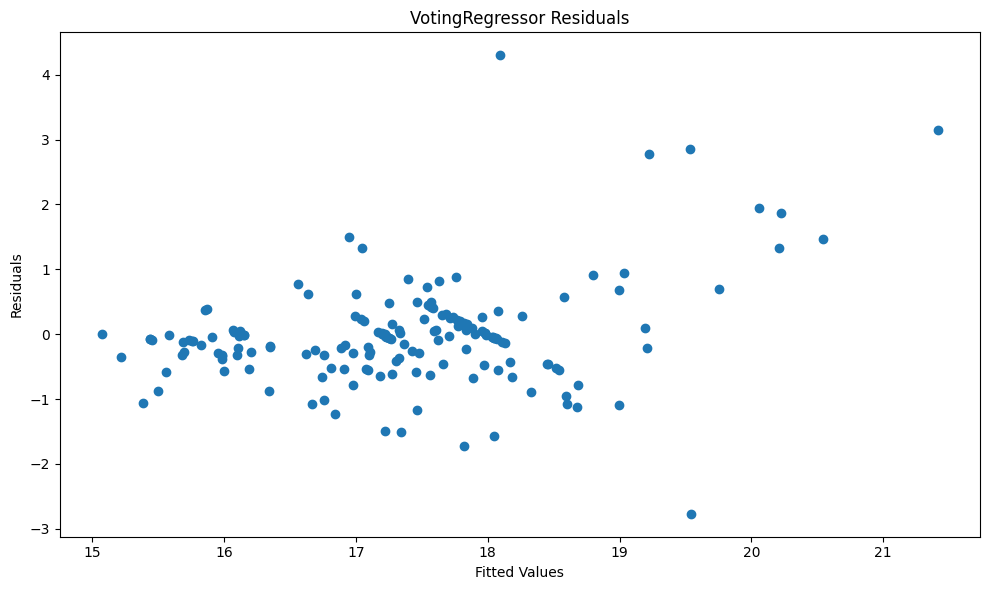

In [76]:
# Plotting the residuals
voting_residuals = y_test - y_pred12
plt.figure(figsize=(10, 6))
plt.scatter(y_pred12, voting_residuals)
plt.title('VotingRegressor Residuals')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()

From the plot, we can see that:

* The residuals seem to be scattered randomly around the horizontal line at 0. This suggests that the model's predictions are unbiased, neither underestimating nor overestimating the target variable consistently.
* There are a few outliers, where the residuals deviate significantly from 0. These could indicate potential issues with the model or outliers in the data that require further investigation.
* The overall spread of the residuals seems to be relatively even. This suggests that the model's variance is consistent across different fitted values.

All in all, the model does not explain about 27.8% of the variance and based on the RMSE, it is off by about 0.8. This could be attributed to the size of the dataset and underlying issues in the dataset which aren't visible. This calls for room for improvement and it will be noted down in the next steps.

With that we can head over to anomaly detection.

### Anomaly Detection.

We will be using this unsupervised learning technique to identify data points in the features that deviate significantly from the expected patterns within the dataset. This will identify unusual patterns that may lead to maize post-harvest loss. We will be using tree models in this study namely:
* Local Outlier Function(LOF)
* Isolation Forest
* One Class SVM

We will begin with Isolation Forest. This is a technique that isolates anomalies by randomly splitting data along features until they become isolated. Data points that require fewer splits are considered more anomalous. It is fast, robust to outliers, there is no need for scaling the data  and is effective for large datasets. We will begin by creating a baseline model and evaluate it.

Number of Inliers: 151
Number of Outliers: 20
RMSE: 16.670151741813502
MAE: 16.585952046783625


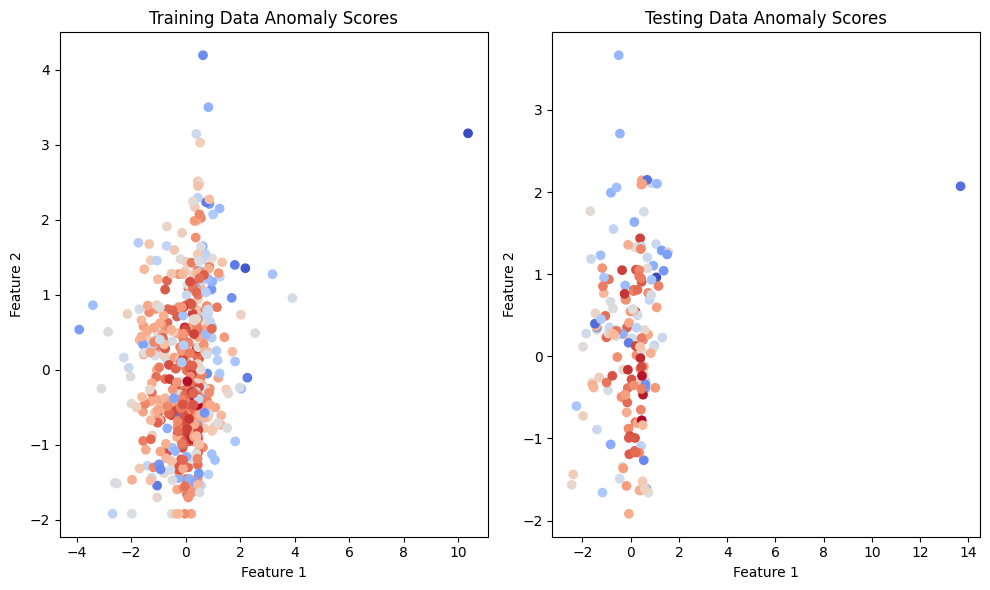

In [77]:
# Scaling the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create and fit model with scaled data
model1 = IsolationForest(contamination=0.1)
model1.fit(X_train_scaled)

# Make predictions on test data
y_pred1 = model1.predict(X_test_scaled)

print(f"Number of Inliers: {len(y_pred1[y_pred1 == 1])}")
print(f"Number of Outliers: {len(y_pred1[y_pred1 == -1])}")

# Evaluation metrics
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred1))}')
print(f'MAE: {mean_absolute_error(y_test, y_pred1)}')

# Get anomaly scores for training and testing data
train_scores = model1.decision_function(X_train_scaled)
test_scores = model1.decision_function(X_test_scaled)

# Plot anomaly scores
plt.figure(figsize=(10, 6))

# Plotting results
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_scores, cmap='coolwarm')  
plt.title("Training Data Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_scores, cmap='coolwarm') 
plt.title("Testing Data Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

From the metrics we can see that the baseline model has an RMSE of 16.71 and an MAE of 16.63. From the plots we can see that there are 25 anomalies in the test data. A few of the anomalies can be seen in the cluster. We can now create a grid search which will help in hypaparameter tuning and in turn help in trying to improve our model.

Best parameters: {'contamination': 0.01, 'max_samples': 0.25, 'n_estimators': 100}
Number of Inliers: 169
Number of Outliers: 2
RMSE: 16.451487180194892
MAE: 16.375425730994152


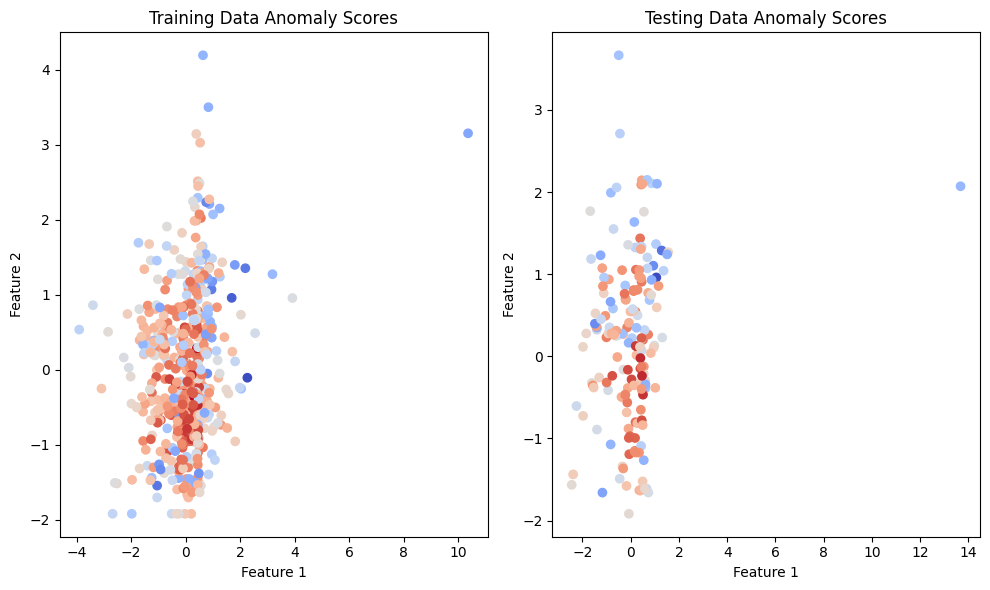

In [78]:
# Define parameter grid
param_grid = {
    'contamination': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'max_samples': [0.25, 0.5, 1.0],
}
# Create and fit Isolation Forest with GridSearchCV
model2 = GridSearchCV(IsolationForest(), param_grid, cv=5, scoring='neg_mean_squared_error')
model2.fit(X_train_scaled)

# Get best model and parameters
best_model1 = model2.best_estimator_
best_params1 = model2.best_params_

# Print best parameters
print("Best parameters:", best_params1)

# Make predictions on test data
y_pred2 = best_model1.predict(X_test_scaled)

# Printing number of outliers
print(f"Number of Inliers: {len(y_pred2[y_pred2 == 1])}")
print(f"Number of Outliers: {len(y_pred2[y_pred2 == -1])}")

# Evaluation metrics
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, y_pred2))}')
print(f'MAE: {mean_absolute_error(y_test, y_pred2)}')

# Get anomaly scores for training and testing data
train_scores = best_model1.decision_function(X_train_scaled)
test_scores = best_model1.decision_function(X_test_scaled)

# Plot anomaly scores
plt.figure(figsize=(10, 6))

# Plotting results
plt.subplot(1, 2, 1)
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=train_scores, cmap='coolwarm') 
plt.title("Training Data Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.subplot(1, 2, 2)
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=test_scores, cmap='coolwarm')  
plt.title("Testing Data Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()

We can see that our model has improved slightly from the baseline. However, just as before, there is a visible cluster within the data but 1 anomaly can be seen in the data. However, Isolation Forests has a few disadvantages such as not providing a score for normalcy and its difficulty to interpret individual feature importance. It also shows the number of anomalies in the test data and we need to see the anomalies in the entire dataset. With these reasons, we will try another algorithm; Local Outlier Factor.

With the Local Outlier Factor, we will be comparing the density of the data point's local neighborhood to the overall density. The points with significantly lower density are considered outliers. It is sensitive to local anomalies, is effective in high-dimensional data and it provides relative outlier scores. We will create a baseline model and we will not be using the split data.

Number of Inliers: 613
Number of Outliers: 69
RMSE: 16.663492002790637
MAE: 16.571984457478006


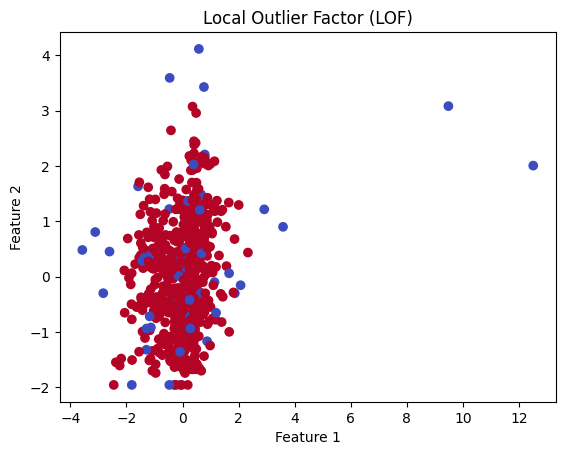

In [79]:
# Standardizing the data
scaler = StandardScaler()
X_transformed_scaled = scaler.fit_transform(X_transformed)

#Create LOF model
lof = LocalOutlierFactor(n_neighbors=5, contamination=0.1) 
y_pred3 = lof.fit_predict(X_transformed_scaled)

# Printing number of outliers
print(f"Number of Inliers: {len(y_pred3[y_pred3 == 1])}")
print(f"Number of Outliers: {len(y_pred3[y_pred3 == -1])}")

# Evaluation metrics
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred3))}')
print(f'MAE: {mean_absolute_error(y, y_pred3)}')

# Identify outliers (-1 indicates outlier)
outliers = X_transformed_scaled[y_pred3 == -1]

# Plotting results 
plt.scatter(X_transformed_scaled[:, 0], X_transformed_scaled[:, 1], c=y_pred3, cmap='coolwarm')  
plt.title("Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The baseline model performs better than the baseline Isolation Forest model but not better than the improved model. We can also see that there are 69 anomalies in the dataset. We can also try and improve the model by hyperparameter tuning.

{'contamination': 0.05, 'n_neighbors': 10}
Number of Inliers: 647
Number of Outliers: 35
RMSE: 16.55991720417644
MAE: 16.47227771260997


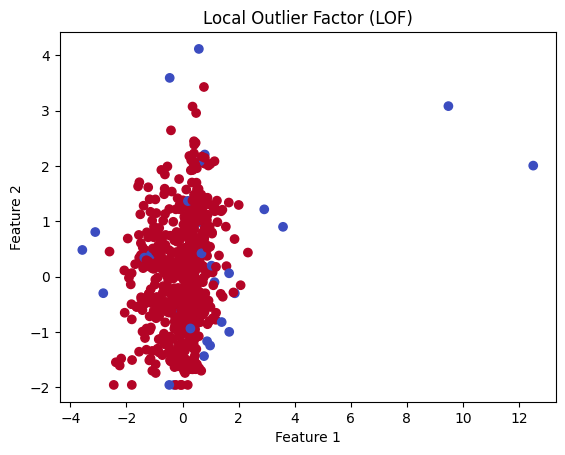

In [80]:
# Grid search
param_grid = {
    'n_neighbors': [10, 20, 30],
    'contamination': [0.05, 0.1, 0.15]
}

# Fitting and predicting the model
grid = GridSearchCV(lof, param_grid, scoring='neg_mean_squared_error') 
grid.fit(X_transformed_scaled)

best_params2 = grid.best_params_
print(best_params2)
best_model2 = grid.best_estimator_

y_pred4 = best_model2.fit_predict(X_transformed_scaled)

# Printing number of outliers
print(f"Number of Inliers: {len(y_pred4[y_pred4 == 1])}")
print(f"Number of Outliers: {len(y_pred4[y_pred4 == -1])}")

# Evaluation metrics
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred4))}')
print(f'MAE: {mean_absolute_error(y, y_pred4)}')

# Identify outliers (-1 indicates outlier)
outliers = X_transformed_scaled[y_pred4 == -1]

plt.scatter(X_transformed_scaled[:, 0], X_transformed_scaled[:, 1], c=y_pred4, cmap='coolwarm') 
plt.title("Local Outlier Factor (LOF)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

We can see that the model has improved slightly. However, it does not perform better compared to the improved Isolation Forest model. We can also see that there are fewer anomalies compared to the baseline LOF model. Since the Local Outlier Factor models are usually sensitive to noise in the data, we will go ahead to the final algorithm, the OneClassSVM model.

This model learns a boundary around normal data points in a high-dimensional space. The data points outside the boundary are considered anomalous. Some of its main strengths include flexible kernel choice its effectiveness for high-dimensional data and its ability to work well with limited labeled data. We will now create a baseline model and see if it improves.

Number of Inliers: 612
Number of Outliers: 70
RMSE: 16.14640677616925
MAE: 16.04398757806175


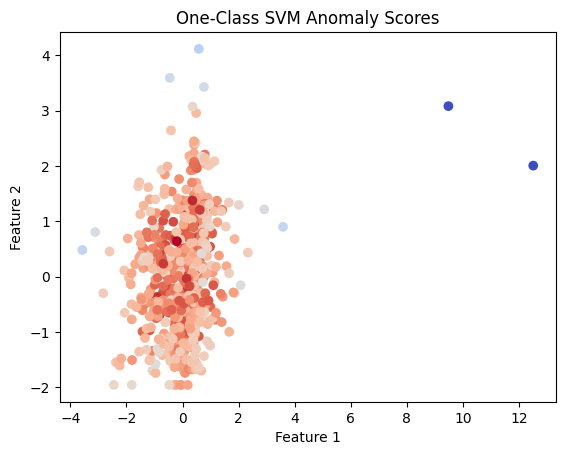

In [81]:
# Create One-Class SVM model
svm = OneClassSVM(kernel='rbf', nu=0.1)  
svm.fit(X_transformed_scaled)

# Get anomaly scores and labels
y_pred5 = svm.decision_function(X_transformed_scaled)  # Higher score: more anomalous
labels1 = svm.predict(X_transformed_scaled)  # 1: inliers, -1: outliers

# Printing number of outliers
print(f"Number of Inliers: {len(labels1[labels1 == 1])}")
print(f"Number of Outliers: {len(labels1[labels1 == -1])}")

# Evaluation metrics
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred5))}')
print(f'MAE: {mean_absolute_error(y, y_pred5)}')

# Identify outliers
outliers3 = X_transformed_scaled[labels1 == -1]

# Plot the results
plt.scatter(X_transformed_scaled[:, 0], X_transformed_scaled[:, 1], c=y_pred5, cmap='coolwarm')  
plt.title("One-Class SVM Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The model has improved significantly compared to the other models. We can also see that most of the data is clustered and there are 70 anomalies detected. We will now try to conduct hyperparameter tuning and see if the model will improve.

{'contamination': 0.05, 'n_neighbors': 10}
Number of Inliers: 644
Number of Outliers: 38
RMSE: 16.78196517037215
MAE: 16.703287158166532


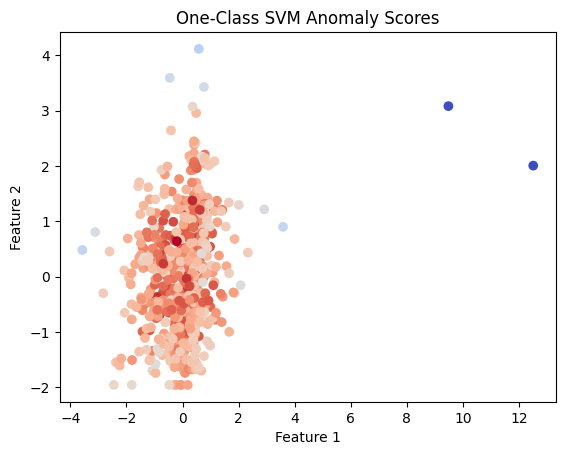

In [82]:
# Grid search
param_grid = {
    'kernel': ['rbf', 'linear'],
    'nu': [0.05, 0.1, 0.15]
}

grid = GridSearchCV(svm, param_grid, scoring='neg_mean_squared_error')  
grid.fit(X_transformed_scaled)

best_params = grid.best_params_
print(best_params2)
best_model3 = grid.best_estimator_

# Fitting the model
best_model3.fit(X_transformed_scaled)

# Get anomaly scores and labels
y_pred6 = best_model3.decision_function(X_transformed_scaled)  # Higher score: more anomalous
labels2 = best_model3.predict(X_transformed_scaled)  # 1: inliers, -1: outliers

# Printing number of outliers
print(f"Number of Inliers: {len(labels2[labels2 == 1])}")
print(f"Number of Outliers: {len(labels2[labels2 == -1])}")

# Evaluation metrics
print(f'RMSE: {np.sqrt(mean_squared_error(y, y_pred6))}')
print(f'MAE: {mean_absolute_error(y, y_pred6)}')

# Identify outliers
outliers4 = X_transformed_scaled[labels2 == -1]

# Plot the results
plt.scatter(X_transformed_scaled[:, 0], X_transformed_scaled[:, 1], c=y_pred5, cmap='coolwarm') 
plt.title("One-Class SVM Anomaly Scores")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

The improved model performs worse than the baseline model. Also, only 38 anomalies were detected in the data. The evaluation results are higher and that means that the baseline OneClassSVM is the best performing model. However, the RMSE of 16.15 and MAE of 16.04 make the model not perfect. This could be because of the size of our dataset. Another limitation of anomaly detection is that the algorithms cannot determine where exactly the anomalies occur in the data. These will be s we will keep in mind when writing our next steps.

We can now head over to time series modeling.

### Time Series Modeling.

Here, we will be creating algorithms that will be able to predict future losses. We will focus on two algorithms, ARIMA and Prophet. This is because the time series data did not show any signs of seasonality and these were the best two models for the job. We will be creating two models per algorithm and we will evaluate their performances. We will begin with a baseline ARIMA model but before we do that we will have to determine whether the p and q values by using the autocorrelation and partial autocorrelation graphs.

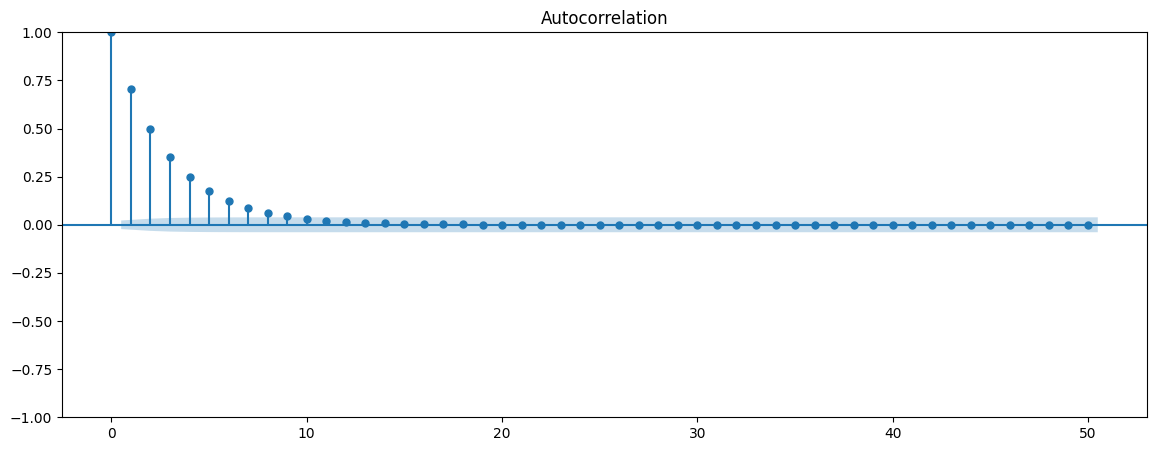

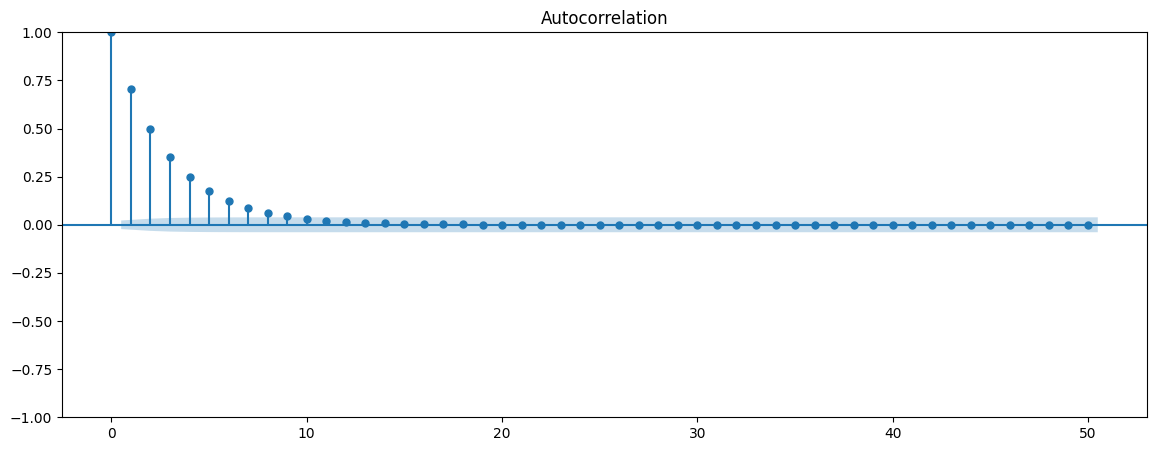

In [83]:
# Plotting ACF
rcParams['figure.figsize'] = 14, 5
plot_acf(ts_diff, lags=50)

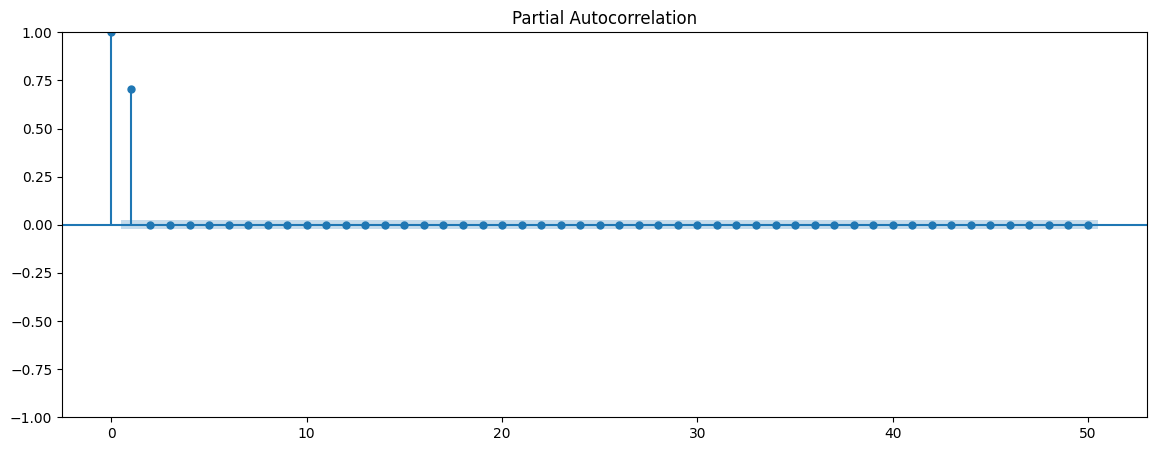

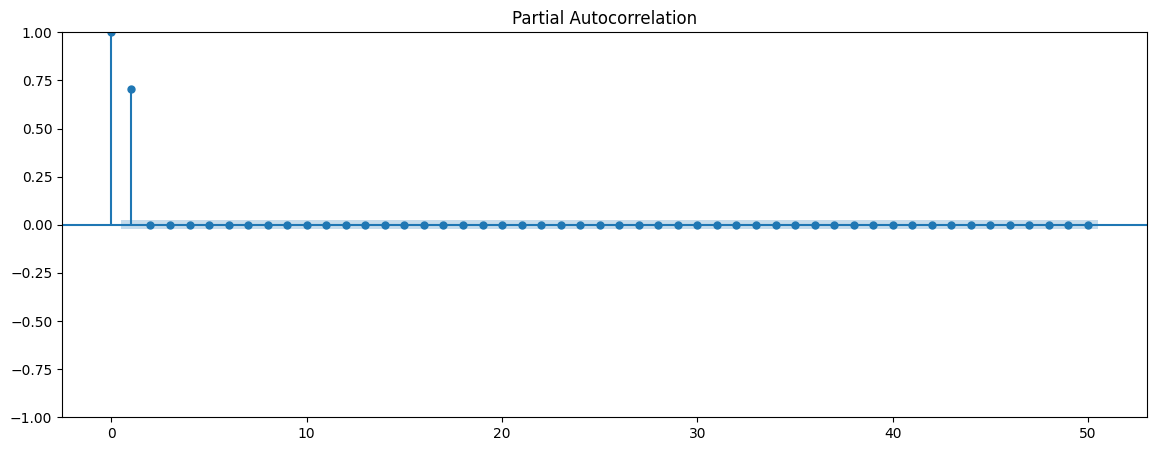

In [84]:
# Plotting PACF
rcParams['figure.figsize'] = 14, 5
plot_pacf(ts_diff, lags=50)

From the plots, an ARIMA(1, 1) model will be the baseline model.

In [85]:
#The baseline model
baseline_model = ARIMA(ts_train, order=(1, 0, 1))
res_arima = baseline_model.fit()
y_pred1 = res_arima.predict(start=len(ts_train), end=len(ts_train) + len(ts_test) - 1, typ='levels')
print(res_arima.summary())
time_series_metrics(ts_test, y_pred1)

                               SARIMAX Results                                
Dep. Variable:        dry weight loss   No. Observations:                 5753
Model:                 ARIMA(1, 0, 1)   Log Likelihood               49188.207
Date:                Tue, 13 Feb 2024   AIC                         -98368.414
Time:                        18:48:51   BIC                         -98341.784
Sample:                    01-02-2000   HQIC                        -98359.146
                         - 10-02-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const           3e-07   2.16e-06      0.139      0.890   -3.94e-06    4.54e-06
ar.L1          0.7071   2.13e-12   3.32e+11      0.000       0.707       0.707
ma.L1      -8.826e-06   6.08e-13  -1.45e+07      0.0

Based on the metrics and the AIC and BIC values, the model seems to be performing well. However, this may have caused overfitting and we need to create another ARIMA model and see if it will have similar performances. We will iterate over values to get the best p and q values for our model.

In [86]:
# Code to iterate through the values of p,d and q modeling each combination 
p = range(0, 4)
q = range(0, 4)
d = range(0, 2)

pdq_combinations = list(itertools.product(p, d, q))

rmse = []
order = []

for pdq in pdq_combinations:
    try:
        model = ARIMA(ts_train, order=pdq).fit()
        y_hat = model.predict(start=len(ts_train), end=len(ts_train) + len(ts_test) - 1, typ='levels')
        error = np.sqrt(mean_squared_error(ts_test, y_hat))
        order.append(pdq)
        rmse.append(error)
    except: 
        continue

c:\Users\san\anaconda3\envs\Kelvin_environment\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\san\anaconda3\envs\Kelvin_environment\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\san\anaconda3\envs\Kelvin_environment\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\san\anaconda3\envs\Kelvin_environment\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\san

In [87]:
#Results from the code above
results = pd.DataFrame(index=order, data=rmse, columns=['RMSE'])
min_value_order = results.idxmin().values[0]
print(min_value_order)

(0, 0, 1)


From the iteration, we can see that an ARIMA(0, 1) model brings out the best results. We will now create the model.

In [88]:
# Creating the final ARIMA model
final_ARIMA_model = ARIMA(ts_train, order=(0, 0, 1))
res_arima2 = final_ARIMA_model.fit()
y_pred2 = res_arima2.predict(start=len(ts_train), end=len(ts_train) + len(ts_test) - 1, typ='levels')
print(res_arima2.summary())
time_series_metrics(ts_test, y_pred2)

c:\Users\san\anaconda3\envs\Kelvin_environment\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:        dry weight loss   No. Observations:                 5753
Model:                 ARIMA(0, 0, 1)   Log Likelihood               48360.120
Date:                Tue, 13 Feb 2024   AIC                         -96714.239
Time:                        18:52:37   BIC                         -96694.267
Sample:                    01-02-2000   HQIC                        -96707.289
                         - 10-02-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.962e-07   1.23e-06     -0.323      0.747    -2.8e-06    2.01e-06
ma.L1          0.7071   7.49e-11   9.45e+09      0.000       0.707       0.707
sigma2      2.882e-09   3.57e-12    808.025      0.0

Here, we can see that the model has a slightly lower performance compared to the baseline model. This can be said to be a better model compared to the other one since it might not have a bigger issue with overfitting compared to the baseline model. 

Since ARIMA models relies heavily on autocorrelation and have issues with outliers, we will try and create a better model using Prophet. It's main advantage is that it is not sensitive to outliers present in the data. Before we create the baseline Prophet model, we will reset the index and rename the columns in the data.

In [89]:
#Resetting the index of the train and test data
ts_train2 = ts_train.reset_index()
ts_train2 = ts_train2.rename(columns={'year': 'ds', 'dry weight loss': 'y'})
ts_test2 = ts_test.reset_index()
ts_test2 = ts_test2.rename(columns={'year': 'ds', 'dry weight loss': 'y'})

After altering the data to be useful in the modeling, we will now create the Prophet baseline model.

In [90]:
# Baseline Prophet model
prophet_model1 = Prophet()
prophet_model1.fit(ts_train2)
future_dates1 = prophet_model1.make_future_dataframe(periods=len(ts_test2), freq='D') 
forecast1 = prophet_model1.predict(future_dates1)
test_predictions1 = forecast1['yhat'][-len(ts_test2):]
time_series_metrics(ts_test2['y'], test_predictions1)

18:52:43 - cmdstanpy - INFO - Chain [1] start processing
18:52:49 - cmdstanpy - INFO - Chain [1] done processing


RMSE: 4.232323885261955e-05
MAE: 2.4792780741743004e-05


Here, we can see that the RMSE is not as good as the ARIMA models but the MAE is better compared to the previous two. We can  now conduct hyperparameter tuning and try to improve the model.

In [91]:
# Define the objective function to optimize
def objective(trial):
    # Create a Prophet model with suggested hyperparameters
    model = Prophet(
        changepoint_prior_scale=trial.suggest_float("changepoint_prior_scale", 0.001, 0.5),
        seasonality_mode=trial.suggest_categorical("seasonality_mode", ["additive", "multiplicative"]),
    )
    # Fit the model to the training data
    model.fit(ts_train2)

    # Make predictions on the validation set
    future_dates = model.make_future_dataframe(periods=len(ts_test2), freq='D')
    forecast = model.predict(future_dates)
    test_predictions = forecast['yhat'][-len(ts_test2):]
    
    # Calculate evaluation metric (e.g., RMSE)
    rmse = np.sqrt(mean_squared_error(ts_test2['y'], test_predictions))

    return rmse  # Minimize RMSE

# Create an Optuna study
study = optuna.create_study(direction="minimize")

# Run the optimization
study.optimize(objective, n_trials=100)  # Adjust the number of trials as needed

# Get the best hyperparameters
best_params = study.best_params

# Create the best model using the optimal hyperparameters
best_model2 = Prophet(**best_params)
# Fit the best model to the entire dataset
best_model2.fit(ts_train2)

# Predicting the values
future_dates = best_model2.make_future_dataframe(periods=len(ts_test2), freq='D')
forecast2 = best_model2.predict(future_dates)
test_predictions2 = forecast2['yhat'][-len(ts_test2):]
time_series_metrics(ts_test2['y'], test_predictions2)

[I 2024-02-13 18:52:52,023] A new study created in memory with name: no-name-f1eae8a2-2f76-4f92-a44b-ce42340b3410
18:52:53 - cmdstanpy - INFO - Chain [1] start processing
18:53:00 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-02-13 18:53:02,874] Trial 0 finished with value: 0.00013692468532959073 and parameters: {'changepoint_prior_scale': 0.48152619511302036, 'seasonality_mode': 'multiplicative'}. Best is trial 0 with value: 0.00013692468532959073.
18:53:05 - cmdstanpy - INFO - Chain [1] start processing
18:53:10 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-02-13 18:53:14,717] Trial 1 finished with value: 4.161956521389341e-05 and parameters: {'changepoint_prior_scale': 0.23258126852630362, 'seasonality_mode': 'additive'}. Best is trial 1 with value: 4.161956521389341e-05.
18:53:16 - cmdstanpy - INFO - Chain [1] start processing
18:53:22 - cmdstanpy - INFO - Chain [1] done processing
[I 2024-02-13 18:53:26,849] Trial 2 finished with value: 0.00013650466481243153 and

RMSE: 3.577830909565049e-05
MAE: 5.485801847452917e-06


After tuning, we can see that the model performance is closer to those of the ARIMA models. 

We can see that all thes models perform very well. However, we will choose the baseline prophet model as our suitable model. This is because it is the model that has the lowest risk of overfitting. 

## Conclusion.

From the project we can conclude that:

* Western Africa countries have the highest maize post-harvest loss, followed by Southern Africa which has the highest maize production quantity amongst the regions.
* The top 5 countries that lose maize after harvest are Tanzania, Cameroon, Mozambique, Benin and Malawi.
* Maize loss rose from 2000 upto around 2010 and then dropped.
* We were able to create a regression model that can give more insights about the relationship between the features and maize loss.
* There were a few anomalies in the data that may have been the cause of maize loss.
* We created a time series model that can predict maize loss across sub-Saharan Africa across the years.

## Recommendations.

From the project, we recommend that:
* Farmers across Sub-Saharan Africa should be educated on better farming techniques and storage in order to mitigate maize loss.
* Government officials should improve infrastructure create policies that will help reduce maize loss.
* Maize stakeholders should invest more to improve their storage and transportation services to combat the issue.
* Agricultural extension workers across these countries should be at the forefront educating and observing farmers through creating their own public forums or visiting the farmers at their homes.
* Food security organizations should be able to use the models and analysis we have done to predict and infer more on maize loss across Sub-Saharan Africa.

## Next Steps.

* Collect more data and continous analysis on the issue. This might help improve our models.
* Continous model training to improve accuracy of the models.

## Saving the models.

In [92]:
# Saving the regression model
regression_model = VotingRegressor(
    estimators=[('rf', RandomForestRegressor(n_estimators=389, max_depth=22, min_samples_split=2, min_samples_leaf=1, random_state=123)), ('xgb', XGBRegressor(random_state=123))],
    weights=[0.7, 0.3])
with open('regression_model.pkl', 'wb') as f:
    joblib.dump(regression_model, f)

In [93]:
# Saving the anomaly model
anomaly_model = OneClassSVM(kernel='rbf', nu=0.1) 
with open('anomaly_model.pkl', 'wb') as f:
    joblib.dump(anomaly_model, f)

In [94]:
# Saving the time series model
ts_model = Prophet()
with open('ts_model.pkl', 'wb') as f:
    joblib.dump(ts_model, f)

## Model deployment.

In [95]:
%%writefile project_app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.svm import OneClassSVM
from prophet import Prophet


st.title("Maize Post-Harvest Loss in Sub-Saharan Africa")

# Data loading and preprocessing (replace with your data and preprocessing steps)
# Loading the datasets
df1 = pd.read_csv("CPI.csv")
df2= pd.read_csv("Dry weight loss.csv")
df3 = pd.read_csv("GPI.csv")
df4 = pd.read_csv("Import.csv")
df5 = pd.read_csv("Nutrients use.csv")
df6 = pd.read_csv("Pesticide use.csv")
df7 = pd.read_csv("temperature change.csv")
df8 = pd.read_csv("Yield.csv")

# Merging df1 with df3
data = df1.merge(df3,left_on=['country','year'],right_on=['country','year'], how="inner")
data = data.drop(["Unnamed: 0_x","Unnamed: 0_y"],axis = 1)

# Merging df1 with df4
data = data.merge(df4,left_on=['country','year'],right_on=['country','year'], how="inner")
data = data.drop(["Unnamed: 0"],axis = 1)

# Merging df1 with df5
data = data.merge(df5,left_on=['country','year'],right_on=['country','year'], how="inner")
data = data.drop(["Unnamed: 0.1", "Unnamed: 0"],axis = 1)

# Merging df1 with df6
data = data.merge(df6,left_on=['country','year'],right_on=['country','year'], how="inner")
data= data.drop(["Unnamed: 0"],axis = 1)

# Merging df1 with df7
data = data.merge(df7,left_on=['country','year'],right_on=['country','year'], how="inner")
data= data.drop(["Unnamed: 0"],axis = 1)

# Merging df1 with df8
data = data.merge(df8,left_on=['country','year'],right_on=['country','year'], how="inner")
data= data.drop(["Unnamed: 0"],axis = 1)

# Merging df1 with df2 which has the target variable
data = data.merge(df2,left_on=['country','year'],right_on=['country','year'], how="inner")
data= data.drop(["Unnamed: 0","Unnamed: 0.1","Unnamed: 0.1.1","Unnamed: 0.2"],axis = 1)

# Creating the 'Region' column

# Dividing the countries into lists of their positions in Africa
central = ["Burundi", 
           "Cameroon", 
           "Central African Republic", 
           "Chad", 
           "Congo", 
           "Democratic Republic of the Congo",
           "Equatorial Guinea",  
           "Gabon"]
east = ["Eritrea", 
        "Ethiopia", 
        "Kenya", 
        "Madagascar", 
        "Rwanda", 
        "Somalia",
        "Sudan",
        "Uganda",
        "United Republic of Tanzania"]
south = ["Angola", 
        "Botswana", 
        "Eswatini", 
        "Lesotho", 
        "Malawi", 
        "Mozambique",
        "Namibia",
        "South Africa",
        "Zambia",
        "Zimbabwe"]
west = ["Benin", 
        "Burkina Faso", 
        "Côte d'Ivoire", 
        "Gambia", 
        "Ghana", 
        "Guinea", 
        "Guinea-Bissau",  
        "Liberia",
        "Mali",
        "Niger",
        "Nigeria",
        "Senegal",
        "Sierra Leone",
        "Togo"]

north = ["Mauritania"]

# Creating an empty 'Region' column in the DataFrame
data['Region'] = ""

# Iterating over each row in the DataFrame and assign the region based on the country
for index, row in data.iterrows():
    if row['country'] in central:
        data.at[index, 'Region'] = "Central Africa"
    elif row['country'] in east:
        data.at[index, 'Region'] = "Eastern Africa"
    elif row['country'] in south:
        data.at[index, 'Region'] = "Southern Africa"
    elif row['country'] in west:
        data.at[index, 'Region'] = "Western Africa"
    elif row['country'] in north:
        data.at[index, 'Region'] = "Northern Africa"
    else:
        data.at[index, 'Region'] = "Other"

# Creating the 'years_to_2050' column
data['years_to_2050'] = 2050 - data['year']

# Reordering the columns
column_order = ['country', 'Region', 'year', 'cpi', 'maize GPI', 'Import Quantity', 'Import Value', 'Cropland nitrogen per unit area', 'Cropland potassium per unit area', 'pesticide use per area of cropland', 'temperature change', 'Area harvested', 'Production', 'Yield', 'years_to_2050', 'dry weight loss']

# Reordering the DataFrame columns
data = data[column_order]

# Convert 'year' column to integer type
data["year"] = data["year"].astype(int)
data.info()

# Selecting the necessary columns
X_fourth = data[['cpi', 'Import Value','Cropland nitrogen per unit area', 'pesticide use per area of cropland', 'Production', 'Yield']]
# Converting their values to the fourth root
for column in X_fourth.columns:
    X_fourth[column] = X_fourth[column] ** 0.25

# Selecting the column
X_cat = data['Region']
# OneHotEncoding 
X_cat = pd.get_dummies(X_cat, columns=['Region'], drop_first=True, dtype=int)
# Combining the two dataframes
X_transformed = pd.concat([X_fourth, X_cat], axis=1)

# combining to our transformed dataset
X_transformed = pd.concat([X_transformed, data['years_to_2050']], axis=1)
X_scaled = StandardScaler().fit_transform(X_transformed)

# Stating the target variable
y = data['dry weight loss'] 

tab_names = ["Inferential Regression", "Anomaly Detection", "Time Series Forecasting"]

with tabs[0]:
    # VotingRegressor Model Training and Evaluation
    model_1 = joblib.load('regression_model.pkl')
    model_1.fit(X_scaled, y)
    y_pred1 = model_1.predict(X_scaled)
    residuals = y - y_pred1

    predictions = pd.DataFrame(y_pred1, index=X_transformed.index)
    predictions = predictions.rename(columns={0:'Predicted dry weight loss'})
    df = pd.concat([data, predictions], axis=1)

    st.header("Inferential Regression Results")
    st.subheader("Regression Results")
    st.dataframe(df)
    st.subheader("Evaluation Metrics")
    st.write(f"R-squared: {r2_score(y, y_pred1)}")
    r2 = r2_score(y, y_pred1)
    n = len(y)
    p = len(X_scaled.T)
    adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p)
    st.write(f"Adjusted R-Squared: {adj_r2}")
    st.write(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred1))}")
    st.write(f"MAE: {mean_absolute_error(y, y_pred1)}")

    # Residuals Plot
    st.subheader("Residuals Plot")
    fig, ax = plt.subplots()
    ax.scatter(y_pred1, residuals)
    ax.set_xlabel("Fitted Values")
    ax.set_ylabel("Residuals")
    st.pyplot(fig)

with tabs[1]:
    # OneClass Model Training and Evaluation
    svm = joblib.load("anomaly_model.pkl")
    svm.fit(X_scaled)
    y_pred_outlier = svm.predict(X_scaled)

    st.header("Anomaly Detection")
    st.subheader("Anomaly Detection Results")
    st.write(f"Number of Inliers: {len(y_pred_outlier[y_pred_outlier == 1])}")
    st.write(f"Number of Outliers: {len(y_pred_outlier[y_pred_outlier == -1])}")
    st.subheader("Evaluation Metrics")
    st.write(f"RMSE: {np.sqrt(mean_squared_error(y, y_pred_outlier))}")
    st.write(f"MAE: {mean_absolute_error(y, y_pred_outlier)}")

    # Anomaly Score Distribution
    st.subheader("Anomaly Score Distribution")
    fig, ax = plt.subplots()
    ax.hist(svm.decision_function(X_scaled), bins="auto")
    ax.set_xlabel("Values")
    ax.set_ylabel("Frequency")
    # Plotting the histogram in Streamlit
    st.pyplot(fig)

with tab[2]:
    # Prophet Forecast
    @st.cache_data
    def load_data():
        # Preprocess the data
        ts = data.copy()
        ts['year'] = pd.to_datetime(ts['year'], format='%Y')
        ts = ts.dropna(subset=['dry weight loss'])
        ts = ts.groupby('year').aggregate({'dry weight loss':'mean'})
        ts = ts.resample('D').asfreq()
        ts = ts.interpolate(method='linear', axis=0, limit_direction='forward')
        ts_prophet = ts.reset_index()
        ts_prophet = ts_prophet.rename(columns={'year': 'ds', 'dry weight loss': 'y'})
        return ts_prophet

    @st.cache_data
    def load_model():
        # Load the Prophet model from the file
        ts_model = joblib.load('ts_model.pkl')
        return ts_model

    ts_prophet = load_data()

    ts_model = load_model()

    def make_prediction(date, n_periods=1):
        ts_model.fit(ts_prophet)
        future_data = ts_model.make_future_dataframe(periods=n_periods, freq="D", include_history=True)
        forecast = ts_model.predict(future_data)
        return forecast

    # Streamlit interface
    st.header("Maize Post-Harvest Loss Forecast")

    selected_date = st.date_input(
        "Select a date for prediction:",
        value=pd.to_datetime("2022-01-01"),
        min_value=pd.to_datetime("2022-01-01"),
        max_value=pd.to_datetime("2050-12-31")
    )

    prediction_days = st.number_input(
        "Number of days to predict (future from selected date):",
        min_value=1,
        max_value=365,
        value=1
    )
    if st.button("Predict"):
        if selected_date:
            forecast = make_prediction(selected_date, prediction_days)
            st.write(f"Predicted dry weight loss for {selected_date}+{prediction_days} days: {forecast['yhat'].iloc[-1]} tonnes")    
        else:
            st.write("Please select a date for prediction")

Overwriting project_app.py
